In [1]:
import os
os.chdir('C:/Users/user/Downloads')

In [1]:
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import docx

# Load the Excel file
Sheet1 = 'Sheet1'
excel_file1 = 'corrected_series_China.xlsx' ### country
df = pd.read_excel(excel_file1, sheet_name=Sheet1)

In [2]:
df

Unnamed: 0  China_4  China_33  China_103  China_165  China_169  \
0              0    797.5    111.00        NaN      73.00       67.5   
1              1    797.5    111.00        NaN      75.33       78.5   
2              2    765.0    107.00        NaN      71.00       72.0   
3              3    765.0    107.00        NaN      71.50       66.0   
4              4    759.0     98.00        NaN      64.66       63.5   
...          ...      ...       ...        ...        ...        ...   
3660        3660      NaN     73.21        NaN      62.24       61.5   
3661        3661      NaN     75.18        NaN      62.72       63.5   
3662        3662      NaN     75.16        NaN      64.18       64.5   
3663        3663      NaN     75.17        NaN      66.19       70.0   
3664        3664      NaN     75.21        NaN      66.24       69.0   

      China_203  China_209  China_213  China_228  China_250  China_265  \
0         220.5      79.00       77.0      277.5     121.00        NaN   
1         214.5      79.00       76.0      277.5     121.00        NaN   
2         202.5      75.00       73.0      266.0     117.00        NaN   
3         202.5      75.00       72.0      266.0     117.00        NaN   
4         200.0      66.00       71.5      264.0     108.00        NaN   
...         ...        ...        ...        ...        ...        ...   
3660       66.0      73.22        NaN        NaN      66.24        NaN   
3661       66.0      73.21        NaN        NaN      66.23        NaN   
3662       66.0      73.19        NaN        NaN      66.20        NaN   
3663       67.5      73.20        NaN        NaN      66.21        NaN   
3664       66.0      73.25        NaN        NaN      66.27        NaN   

           Date  
0    2010-01-01  
1    2010-01-04  
2    2010-01-05  
3    2010-01-06  
4    2010-01-07  
...         ...  
3660 2024-01-12  
3661 2024-01-15  
3662 2024-01-16  
3663 2024-01-17  
3664 2024-01-18  

[3665 rows x 13 columns]

In [3]:
breaksdf = pd.read_excel("BreaksForPY.xlsx")
breaksdf = breaksdf.sort_values(by = ["company", "Date"])[:24].reset_index(drop=True)    ### country
breaksdict = {}
companiesset = set(breaksdf["company"])
for i in companiesset:
    dateslst = []
    for j in breaksdf[(breaksdf["company"] == i)]["Date"]:
        dateslst.append(j)
    for j in range(4 - len(dateslst)):
        dateslst.append(None)
    breaksdict[i] = dateslst
breaksdf2 = pd.DataFrame(breaksdict)
breaksdf2

China_250  China_169  China_213   China_33  China_209    China_4  \
0 2012-09-24 2014-09-23 2014-01-16 2013-12-09 2012-04-04 2012-05-31   
1 2020-03-23 2021-04-08 2020-03-05 2016-01-19 2021-10-08 2014-11-19   
2        NaT        NaT        NaT        NaT        NaT        NaT   
3        NaT        NaT        NaT        NaT        NaT        NaT   

   China_228  China_103  China_265  China_165  China_203  
0 2018-03-01 2011-10-25 2011-08-19 2013-06-18 2012-05-31  
1 2020-03-05 2015-10-14 2015-05-15 2020-03-05 2014-09-23  
2        NaT        NaT 2016-12-05        NaT 2020-04-10  
3        NaT        NaT        NaT        NaT        NaT

In [4]:
excel_file2 = 'Tests.xlsx'
sheet_name2 = 'Kept_Regressors'
regressors_df = pd.read_excel(excel_file2, sheet_name=sheet_name2)

In [5]:
regressors_df

Exog_Names  India_8  India_36  India_40  India_67  India_69  \
0   Price_India_5-Year_Bond        0         0         0         1         1   
1               Price_BRENT        1         1         1         1         1   
2             Price_BSE-500        1         1         1         1         1   
3             Price_EUR_INR        1         1         1         1         1   
4             Price_USD_INR        1         1         1         1         1   
5                 Price_GAS        0         0         0         0         0   
6                Price_GOLD        0         1         1         1         1   
7   Price_China_5-Year_Bond        0         0         0         0         0   
8             Price_CSI_300        0         0         0         0         0   
9             Price_EUR_CNY        0         0         0         0         0   
10            Price_USD_CNY        0         0         0         0         0   

    India_124  India_136  India_153  India_160  ...  China_33  China_103  \
0           0          0          0          0  ...         0          0   
1           1          1          1          1  ...         1          0   
2           1          0          1          0  ...         0          0   
3           1          1          1          1  ...         0          0   
4           1          1          1          1  ...         0          0   
5           0          0          0          0  ...         0          1   
6           1          1          0          1  ...         1          1   
7           0          0          0          0  ...         1          0   
8           0          0          0          0  ...         0          0   
9           0          0          0          0  ...         1          1   
10          0          0          0          0  ...         1          1   

    China_165  China_169  China_203  China_209  China_213  China_228  \
0           0          0          0          0          0          0   
1           1          1          1          1          1          1   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           0          0          0          0          0          0   
5           0          1          1          1          1          1   
6           1          1          1          1          0          1   
7           1          0          1          0          1          1   
8           1          1          1          0          0          1   
9           1          1          1          1          1          1   
10          1          1          1          1          1          1   

    China_250  China_265  
0           0          0  
1           1          1  
2           0          0  
3           0          0  
4           0          0  
5           0          1  
6           1          1  
7           1          1  
8           0          1  
9           1          1  
10          1          0  

[11 rows x 25 columns]

In [7]:
excel_file3 = 'corrected_series_exog.xlsx'
exog_df = pd.read_excel(excel_file3, sheet_name=Sheet1)

exog_df

Unnamed: 0  Price_China_5-Year_Bond  Price_India_5-Year_Bond  \
0              0                    2.980                    7.253   
1              1                    2.980                    7.253   
2              2                    2.950                    7.211   
3              3                    2.950                    7.241   
4              4                    2.980                    7.266   
...          ...                      ...                      ...   
3660        3660                    2.409                    7.058   
3661        3661                    2.418                    7.023   
3662        3662                    2.431                    7.021   
3663        3663                    2.408                    7.039   
3664        3664                    2.405                    7.050   

      Price_CSI_300  Price_BRENT  Price_BSE-500  Price_EUR_CNY  Price_USD_CNY  \
0           3535.23        80.12    6903.629883         9.8423         6.8285   
1           3535.23        80.12    6903.629883         9.8423         6.8285   
2           3564.04        80.59    6974.490234         9.8091         6.8268   
3           3541.73        81.89    6994.149902         9.8413         6.8278   
4           3471.46        81.51    6971.419922         9.7764         6.8281   
...             ...          ...            ...            ...            ...   
3660        3284.17        78.29   31215.689453         7.8466         7.1665   
3661        3280.92        78.15   31440.699219         7.8509         7.1711   
3662        3300.88        78.29   31346.189453         7.8186         7.1902   
3663        3229.08        77.88   30808.230469         7.8300         7.1960   
3664        3274.73        79.10   30693.109375         7.8250         7.1961   

      Price_EUR_INR  Price_USD_INR  Price_GAS  Price_GOLD       Date  
0           66.7295         46.295       5884     1118.30 2010-01-01  
1           66.7295         46.295       5884     1118.30 2010-01-04  
2           66.3900         46.205       5637     1118.70 2010-01-05  
3           65.8645         45.695       6009     1136.50 2010-01-06  
4           65.3525         45.650       5806     1133.70 2010-01-07  
...             ...            ...        ...         ...        ...  
3660        90.7200         82.857       3313     2061.10 2024-01-12  
3661        90.6790         82.827       3066     2057.85 2024-01-15  
3662        90.3460         83.084       2900     2039.70 2024-01-16  
3663        90.5100         83.182       2870     2015.90 2024-01-17  
3664        90.4340         83.165       2697     2031.10 2024-01-18  

[3665 rows x 13 columns]

In [8]:
# Create a dictionary to map CDS spread names to their exogenous variables
exog_vars_dict = {}
for column in regressors_df.columns[1:]:
    spread_name = column
    exog_vars = list(regressors_df.loc[regressors_df[column] == 1, 'Exog_Names'])
    exog_vars_dict[spread_name] = exog_vars

In [9]:
exog_vars_dict

{'India_8': ['Price_BRENT', 'Price_BSE-500', 'Price_EUR_INR', 'Price_USD_INR'],
 'India_36': ['Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR',
  'Price_GOLD'],
 'India_40': ['Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR',
  'Price_GOLD'],
 'India_67': ['Price_India_5-Year_Bond',
  'Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR',
  'Price_GOLD'],
 'India_69': ['Price_India_5-Year_Bond',
  'Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR',
  'Price_GOLD'],
 'India_124': ['Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR',
  'Price_GOLD'],
 'India_136': ['Price_BRENT', 'Price_EUR_INR', 'Price_USD_INR', 'Price_GOLD'],
 'India_153': ['Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR'],
 'India_160': ['Price_BRENT', 'Price_EUR_INR', 'Price_USD_INR', 'Price_GOLD'],
 'India_172': ['Price_India_5-Year_Bond',
  'Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  '

In [6]:
# Чтобы не мучиться

chosen_lags = {'China_4': 3, 'China_33': 4, 'China_103': 2, 'China_165': 5, 'China_169': 4, 'China_203': 2, 'China_209': 4, 'China_213': 2, 'China_228': 3, 'China_250': 2, 'China_265': 6}

China_4

Evaluating column: China_4
Exogenous variables for China_4 2010-01-01 - 2012-05-31: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_4 2010-01-01 - 2012-05-31 ARIMA(0,1,0) Metrics:
RMSE: 45.3134, MAE: 33.4159, MAPE: 2.4639
China_4 2010-01-01 - 2012-05-31 ARIMA(3,1,0) Metrics:
RMSE: 43.0574, MAE: 31.9050, MAPE: 2.3598
Better model for China_4 2010-01-01 - 2012-05-31: ARIMA(3,1,0)


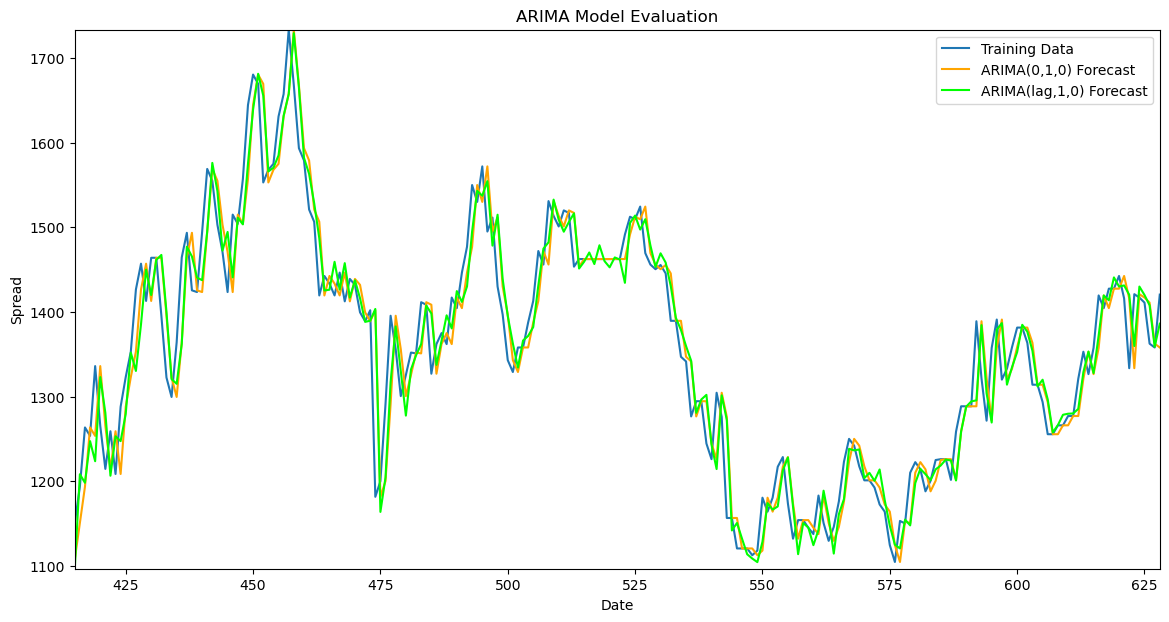


Evaluating column: China_4
Exogenous variables for China_4 2012-05-31 - 2014-11-19: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_4 2012-05-31 - 2014-11-19 ARIMA(0,1,0) Metrics:
RMSE: 12.3469, MAE: 7.7009, MAPE: 1.3565
China_4 2012-05-31 - 2014-11-19 ARIMA(3,1,0) Metrics:
RMSE: 13.0458, MAE: 8.9857, MAPE: 1.5945
Better model for China_4 2012-05-31 - 2014-11-19: ARIMA(0,1,0)


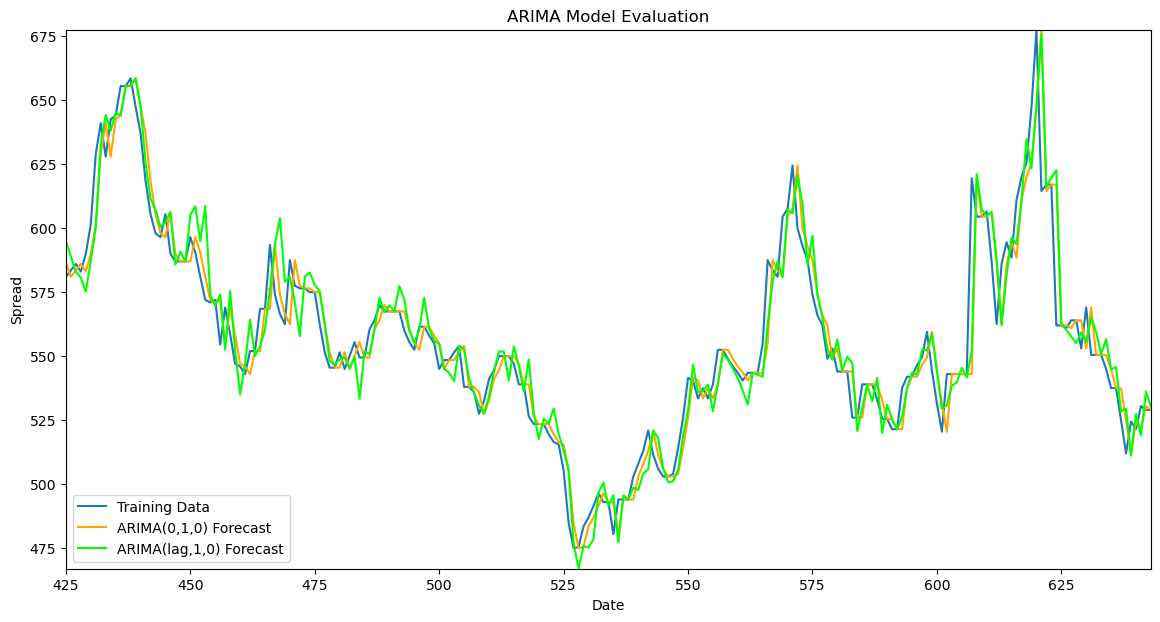


Evaluating column: China_4
Exogenous variables for China_4 2014-11-19 - 2023-06-07: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_4 2014-11-19 - 2023-06-07 ARIMA(0,1,0) Metrics:
RMSE: 7.1477, MAE: 3.7451, MAPE: 0.8142
China_4 2014-11-19 - 2023-06-07 ARIMA(3,1,0) Metrics:
RMSE: 7.5762, MAE: 5.0110, MAPE: 1.0960
Better model for China_4 2014-11-19 - 2023-06-07: ARIMA(0,1,0)


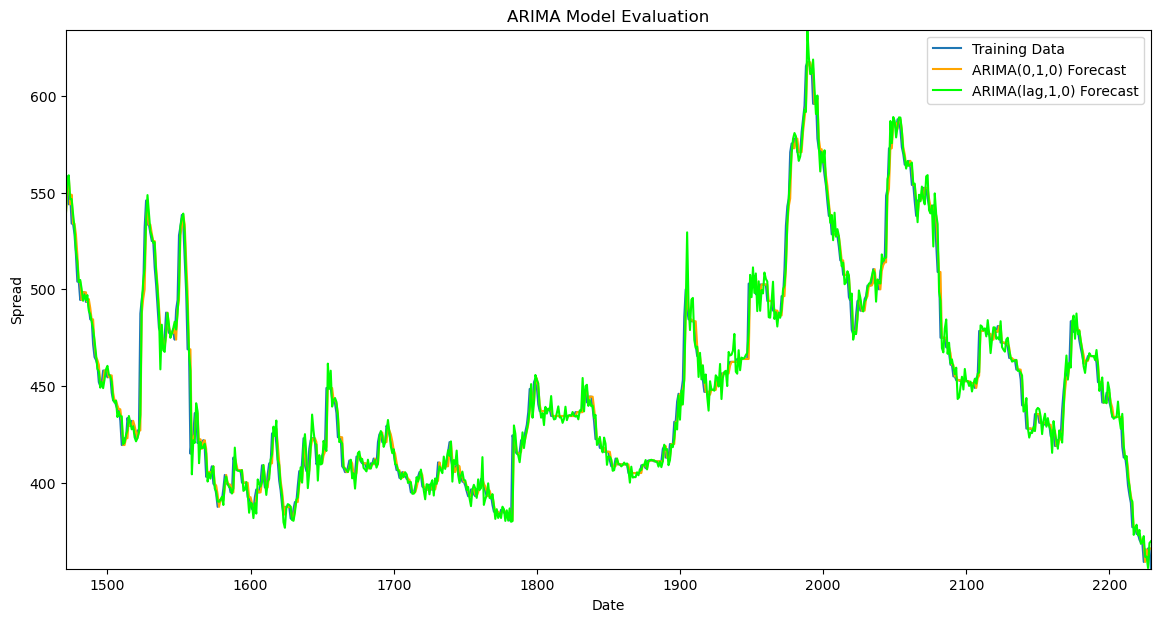

China_33

Evaluating column: China_33
Exogenous variables for China_33 2010-01-01 - 2013-12-09: Price_BRENT, Price_GOLD, Price_China_5-Year_Bond, Price_EUR_CNY, Price_USD_CNY
China_33 2010-01-01 - 2013-12-09 ARIMA(0,1,0) Metrics:
RMSE: 3.3891, MAE: 1.6166, MAPE: 1.2331
China_33 2010-01-01 - 2013-12-09 ARIMA(4,1,0) Metrics:
RMSE: 3.2877, MAE: 1.6760, MAPE: 1.2983
Better model for China_33 2010-01-01 - 2013-12-09: ARIMA(0,1,0)


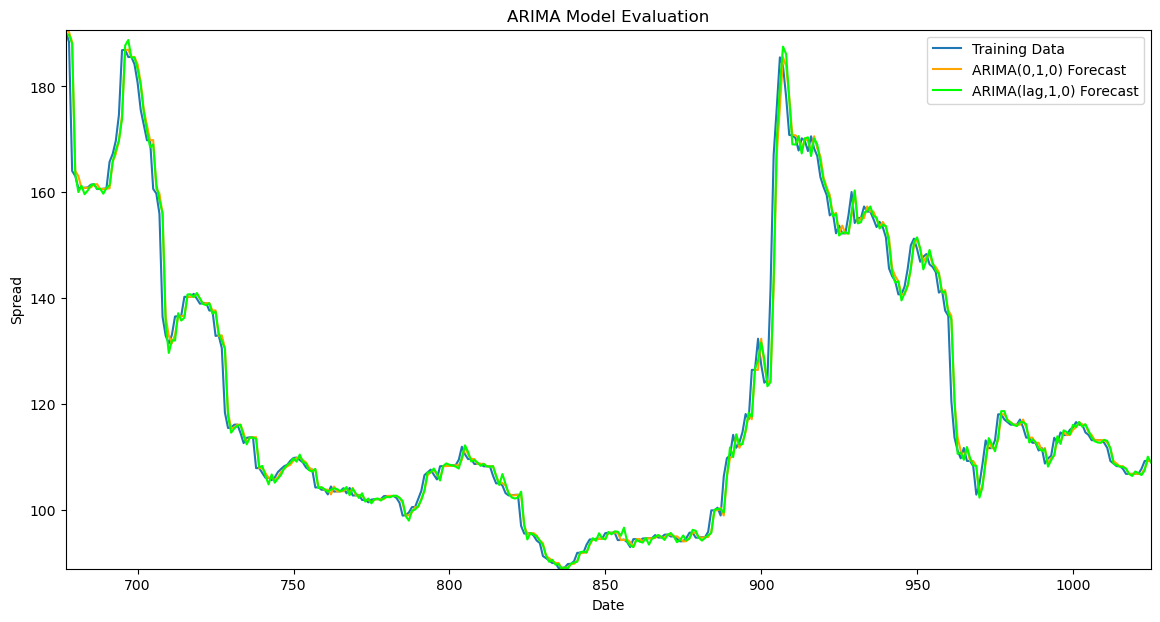


Evaluating column: China_33
Exogenous variables for China_33 2013-12-09 - 2016-01-19: Price_BRENT, Price_GOLD, Price_China_5-Year_Bond, Price_EUR_CNY, Price_USD_CNY
China_33 2013-12-09 - 2016-01-19 ARIMA(0,1,0) Metrics:
RMSE: 2.5348, MAE: 1.5695, MAPE: 1.1751
China_33 2013-12-09 - 2016-01-19 ARIMA(4,1,0) Metrics:
RMSE: 2.5629, MAE: 1.7056, MAPE: 1.2816
Better model for China_33 2013-12-09 - 2016-01-19: ARIMA(0,1,0)


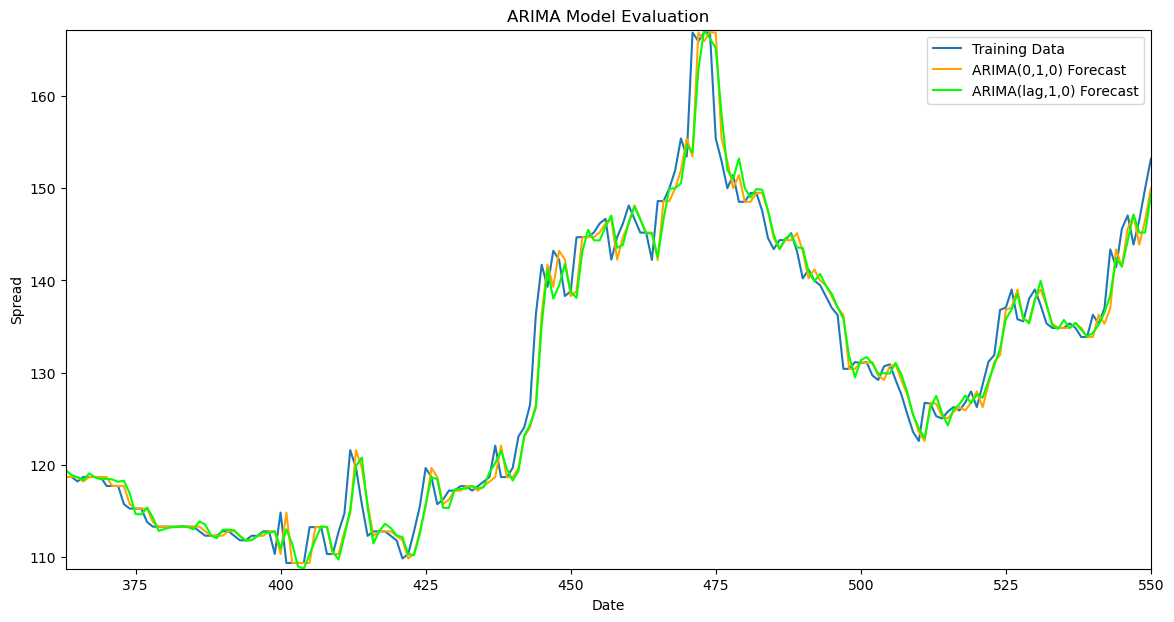


Evaluating column: China_33
Exogenous variables for China_33 2016-01-19 - 2024-01-18: Price_BRENT, Price_GOLD, Price_China_5-Year_Bond, Price_EUR_CNY, Price_USD_CNY
China_33 2016-01-19 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 2.5634, MAE: 1.1669, MAPE: 1.3712
China_33 2016-01-19 - 2024-01-18 ARIMA(4,1,0) Metrics:
RMSE: 2.5732, MAE: 1.3104, MAPE: 1.5627
Better model for China_33 2016-01-19 - 2024-01-18: ARIMA(0,1,0)


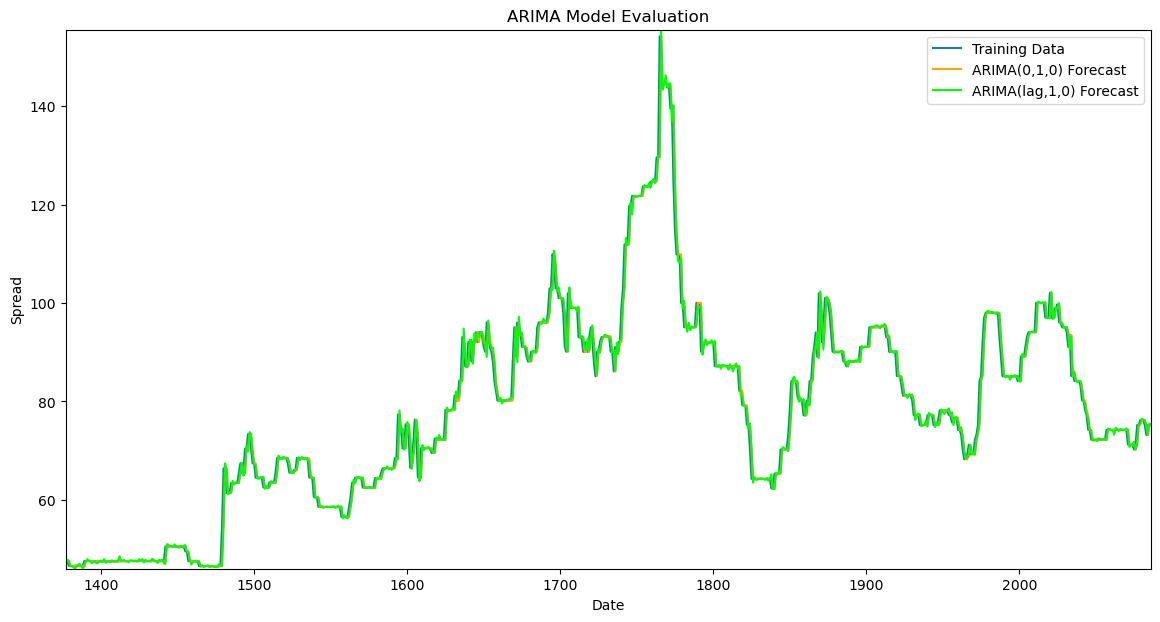

China_103

Evaluating column: China_103
Exogenous variables for China_103 2014-11-21 - 2015-10-14: Price_GAS, Price_GOLD, Price_EUR_CNY, Price_USD_CNY
China_103 2014-11-21 - 2015-10-14 ARIMA(0,1,0) Metrics:
RMSE: 2.8837, MAE: 1.9187, MAPE: 1.3265
China_103 2014-11-21 - 2015-10-14 ARIMA(2,1,0) Metrics:
RMSE: 2.8624, MAE: 1.9782, MAPE: 1.3661
Better model for China_103 2014-11-21 - 2015-10-14: ARIMA(0,1,0)


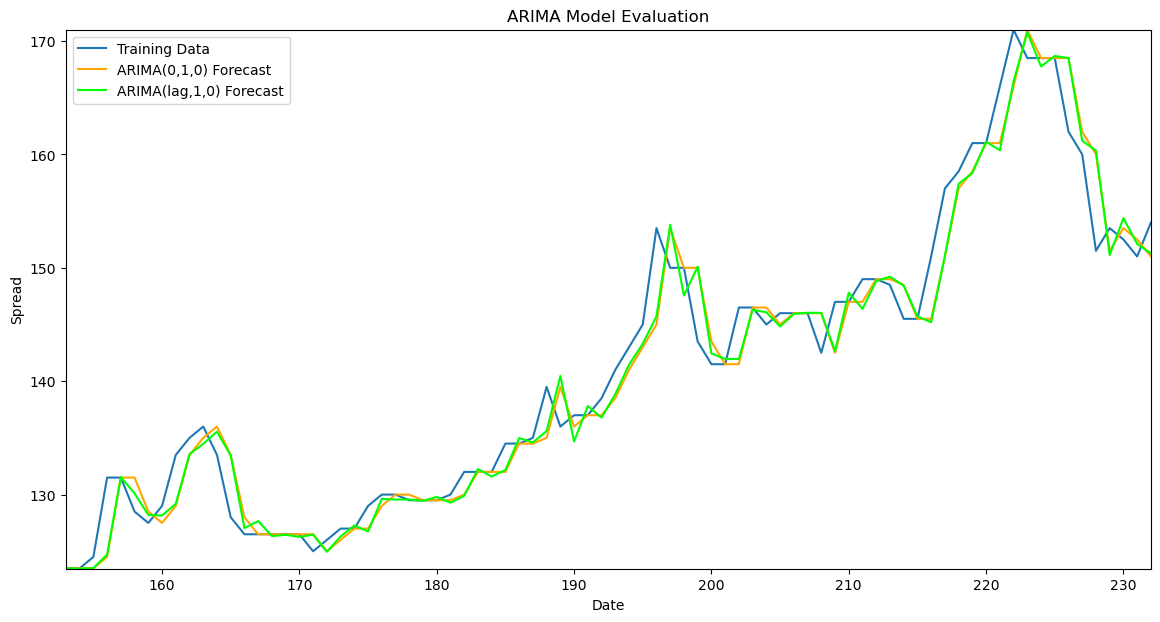


Evaluating column: China_103
Exogenous variables for China_103 2015-10-14 - 2023-04-17: Price_GAS, Price_GOLD, Price_EUR_CNY, Price_USD_CNY
China_103 2015-10-14 - 2023-04-17 ARIMA(0,1,0) Metrics:
RMSE: 4.2480, MAE: 0.7622, MAPE: 1.1432
China_103 2015-10-14 - 2023-04-17 ARIMA(2,1,0) Metrics:
RMSE: 4.2720, MAE: 1.0104, MAPE: 1.5753
Better model for China_103 2015-10-14 - 2023-04-17: ARIMA(0,1,0)


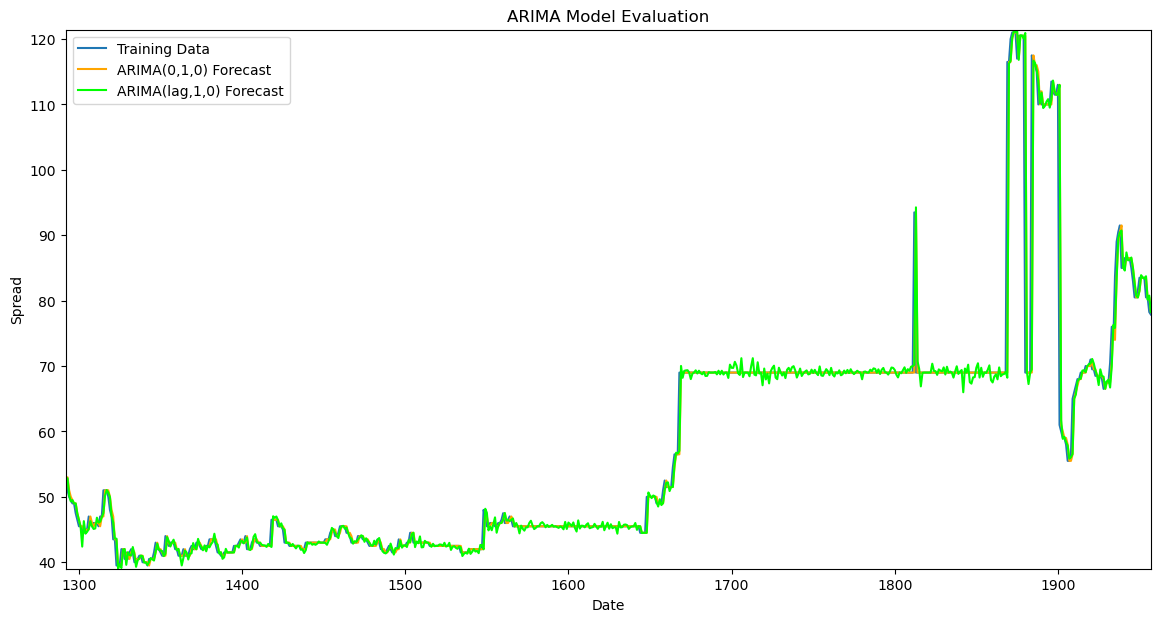

China_165

Evaluating column: China_165
Exogenous variables for China_165 2010-01-01 - 2013-06-18: Price_BRENT, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_165 2010-01-01 - 2013-06-18 ARIMA(0,1,0) Metrics:
RMSE: 2.6443, MAE: 1.8501, MAPE: 2.1000
China_165 2010-01-01 - 2013-06-18 ARIMA(5,1,0) Metrics:
RMSE: 2.4718, MAE: 1.7974, MAPE: 2.0738
Better model for China_165 2010-01-01 - 2013-06-18: ARIMA(5,1,0)


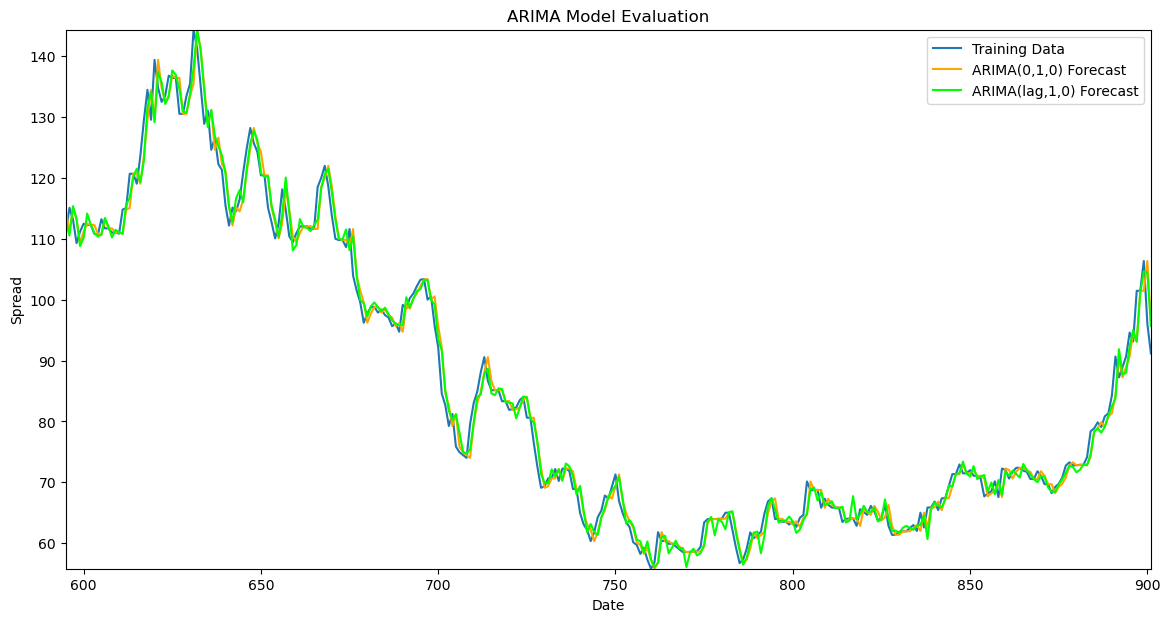


Evaluating column: China_165
Exogenous variables for China_165 2013-06-18 - 2020-03-05: Price_BRENT, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_165 2013-06-18 - 2020-03-05 ARIMA(0,1,0) Metrics:
RMSE: 1.6672, MAE: 1.1312, MAPE: 2.1358
China_165 2013-06-18 - 2020-03-05 ARIMA(5,1,0) Metrics:
RMSE: 1.5477, MAE: 1.0631, MAPE: 2.0100
Better model for China_165 2013-06-18 - 2020-03-05: ARIMA(5,1,0)


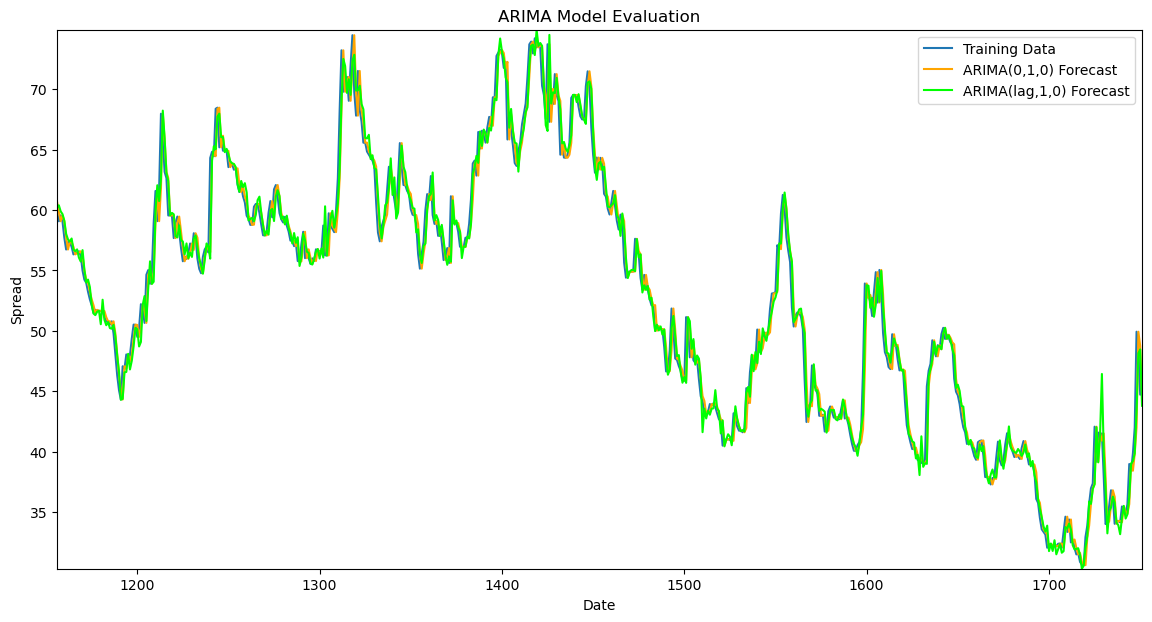


Evaluating column: China_165
Exogenous variables for China_165 2020-03-05 - 2024-01-18: Price_BRENT, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_165 2020-03-05 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 3.1715, MAE: 1.8744, MAPE: 2.3994
China_165 2020-03-05 - 2024-01-18 ARIMA(5,1,0) Metrics:
RMSE: 3.0998, MAE: 1.8717, MAPE: 2.4033
Better model for China_165 2020-03-05 - 2024-01-18: ARIMA(5,1,0)


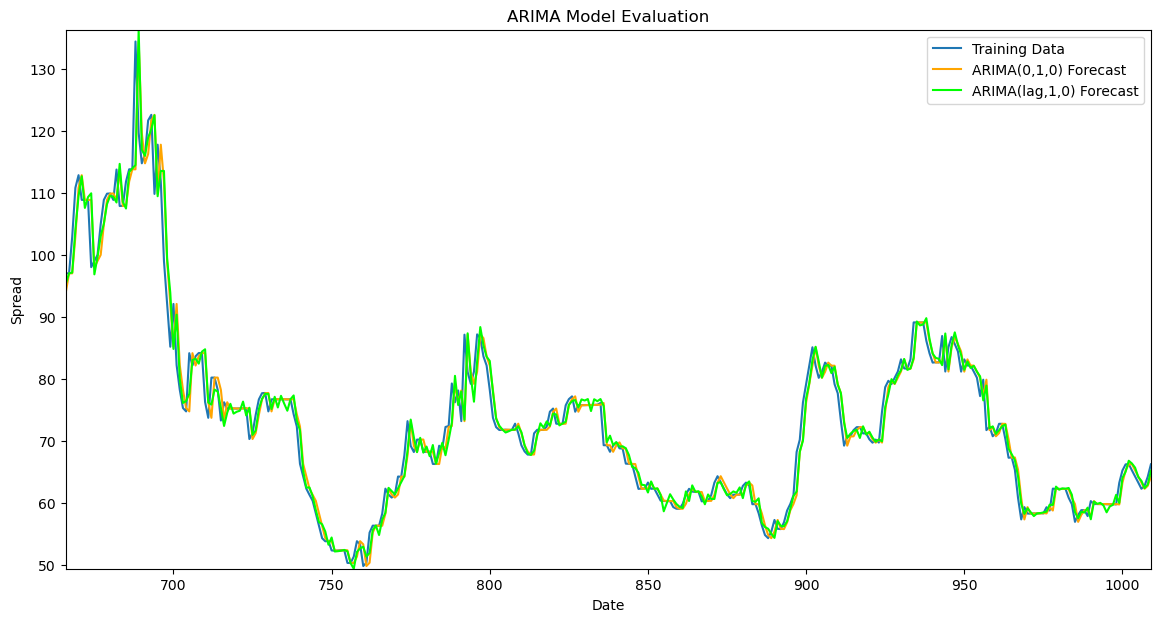

China_169

Evaluating column: China_169
Exogenous variables for China_169 2010-01-01 - 2014-09-23: Price_BRENT, Price_GAS, Price_GOLD, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_169 2010-01-01 - 2014-09-23 ARIMA(0,1,0) Metrics:
RMSE: 3.2242, MAE: 1.9117, MAPE: 2.1971
China_169 2010-01-01 - 2014-09-23 ARIMA(4,1,0) Metrics:
RMSE: 3.2211, MAE: 2.0598, MAPE: 2.3943
Better model for China_169 2010-01-01 - 2014-09-23: ARIMA(0,1,0)


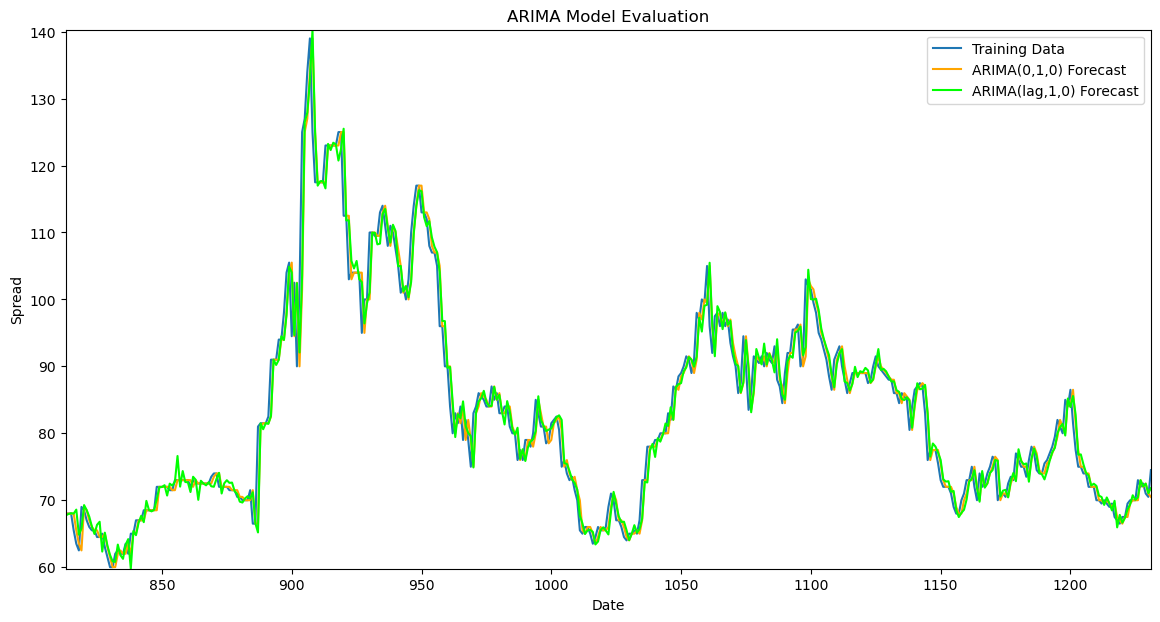


Evaluating column: China_169
Exogenous variables for China_169 2014-09-23 - 2021-04-08: Price_BRENT, Price_GAS, Price_GOLD, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_169 2014-09-23 - 2021-04-08 ARIMA(0,1,0) Metrics:
RMSE: 2.6390, MAE: 1.4469, MAPE: 3.1743
China_169 2014-09-23 - 2021-04-08 ARIMA(4,1,0) Metrics:
RMSE: 2.4731, MAE: 1.4479, MAPE: 3.2625
Better model for China_169 2014-09-23 - 2021-04-08: ARIMA(0,1,0)


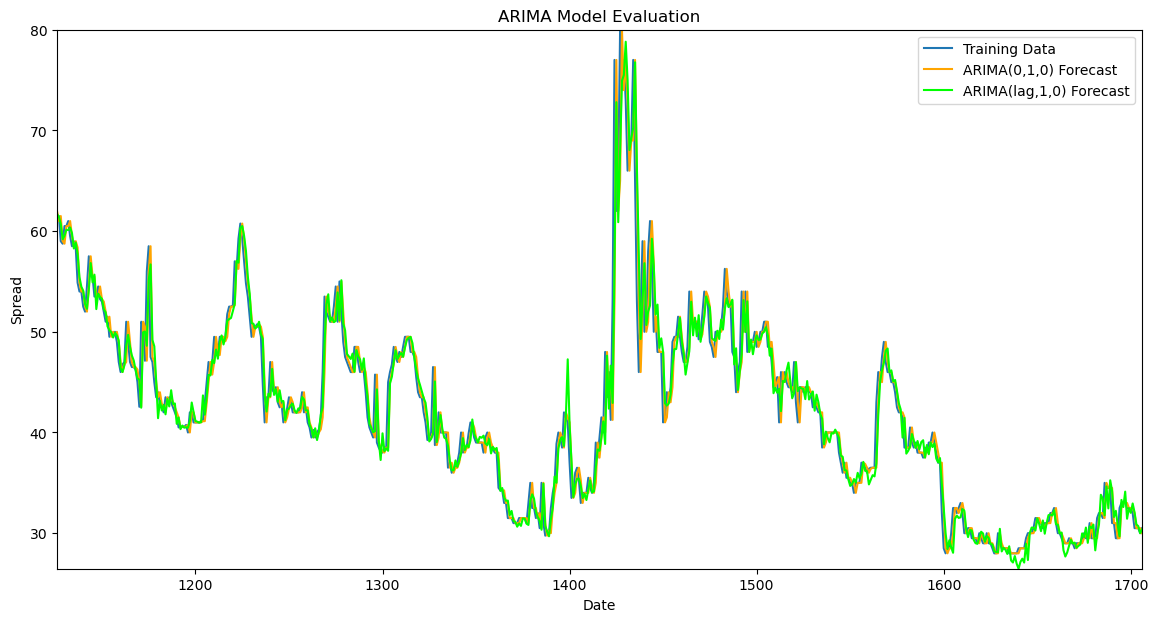


Evaluating column: China_169
Exogenous variables for China_169 2021-04-08 - 2024-01-18: Price_BRENT, Price_GAS, Price_GOLD, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_169 2021-04-08 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 2.4169, MAE: 1.7520, MAPE: 2.4927
China_169 2021-04-08 - 2024-01-18 ARIMA(4,1,0) Metrics:
RMSE: 2.5538, MAE: 1.9338, MAPE: 2.7547
Better model for China_169 2021-04-08 - 2024-01-18: ARIMA(0,1,0)


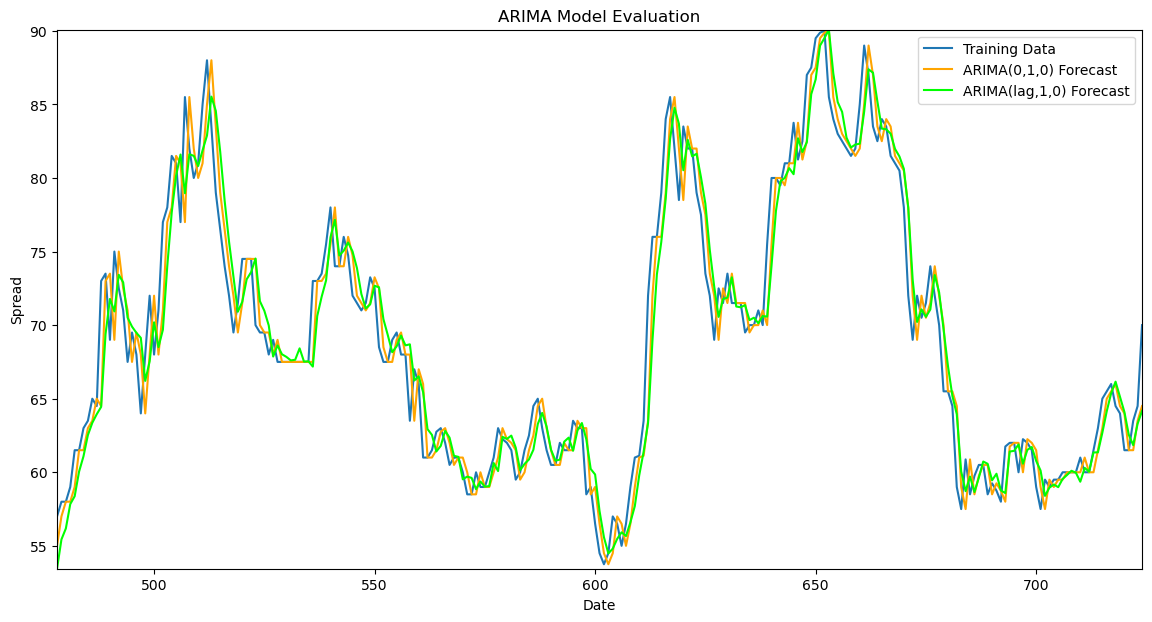

China_203

Evaluating column: China_203
Exogenous variables for China_203 2010-01-01 - 2012-05-31: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_203 2010-01-01 - 2012-05-31 ARIMA(0,1,0) Metrics:
RMSE: 11.4636, MAE: 8.4556, MAPE: 2.4682
China_203 2010-01-01 - 2012-05-31 ARIMA(2,1,0) Metrics:
RMSE: 10.9191, MAE: 8.0547, MAPE: 2.3536
Better model for China_203 2010-01-01 - 2012-05-31: ARIMA(2,1,0)


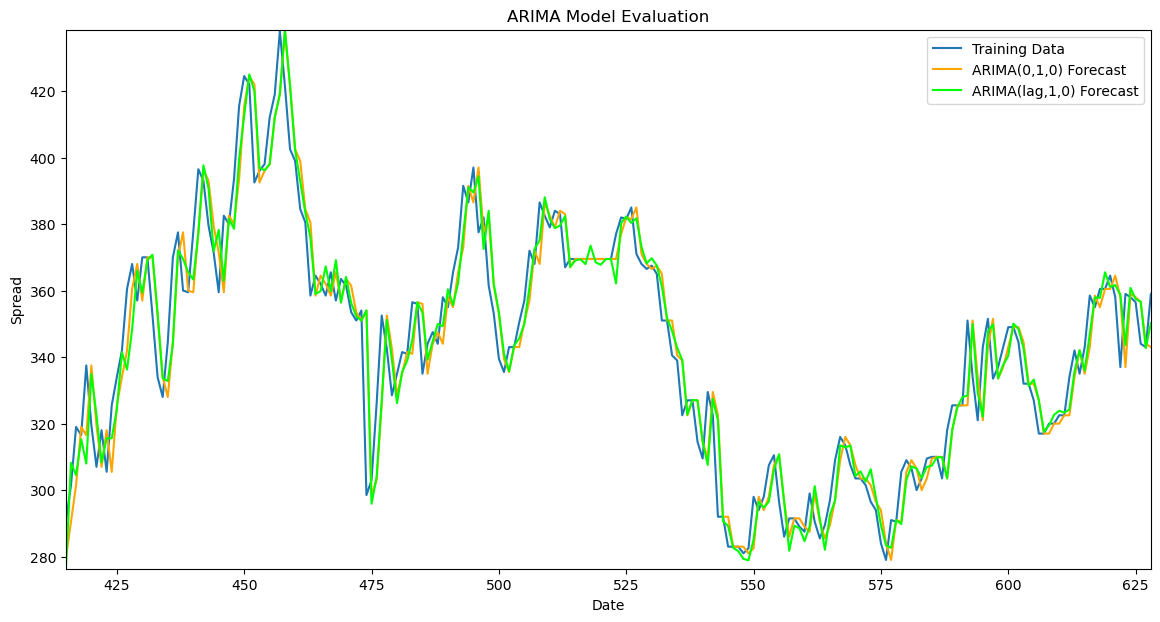


Evaluating column: China_203
Exogenous variables for China_203 2012-05-31 - 2014-09-23: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_203 2012-05-31 - 2014-09-23 ARIMA(0,1,0) Metrics:
RMSE: 2.2913, MAE: 1.5922, MAPE: 1.1200
China_203 2012-05-31 - 2014-09-23 ARIMA(2,1,0) Metrics:
RMSE: 2.6209, MAE: 1.9865, MAPE: 1.4022
Better model for China_203 2012-05-31 - 2014-09-23: ARIMA(0,1,0)


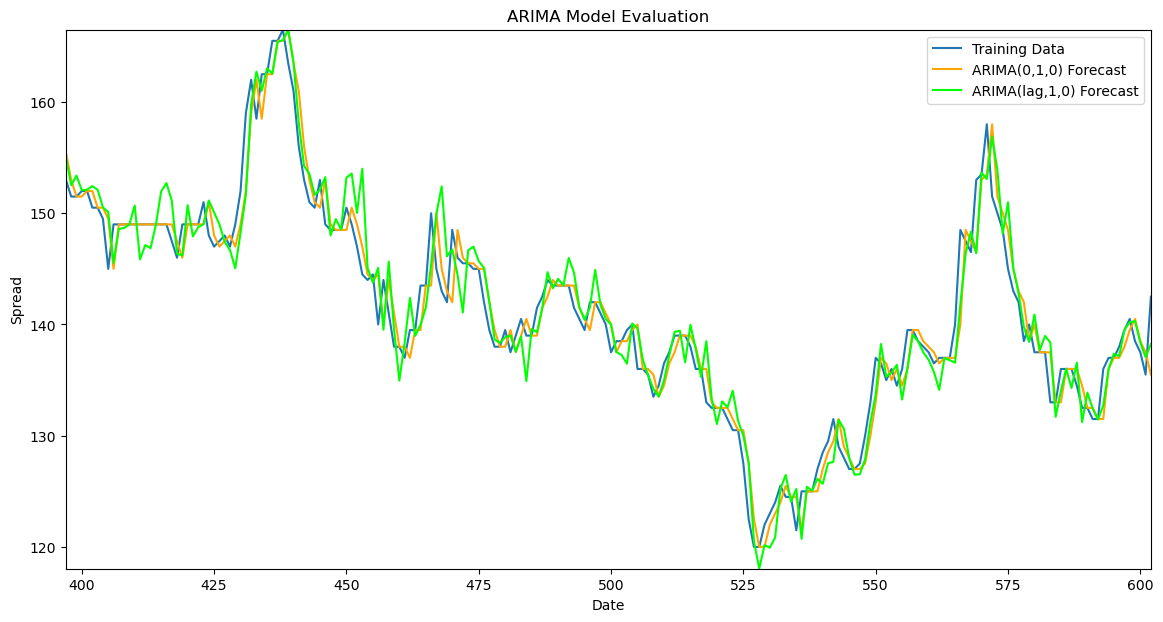


Evaluating column: China_203
Exogenous variables for China_203 2014-09-23 - 2020-04-10: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_203 2014-09-23 - 2020-04-10 ARIMA(0,1,0) Metrics:
RMSE: 5.8273, MAE: 2.6105, MAPE: 1.9014
China_203 2014-09-23 - 2020-04-10 ARIMA(2,1,0) Metrics:
RMSE: 5.6950, MAE: 2.5575, MAPE: 1.8755
Better model for China_203 2014-09-23 - 2020-04-10: ARIMA(2,1,0)


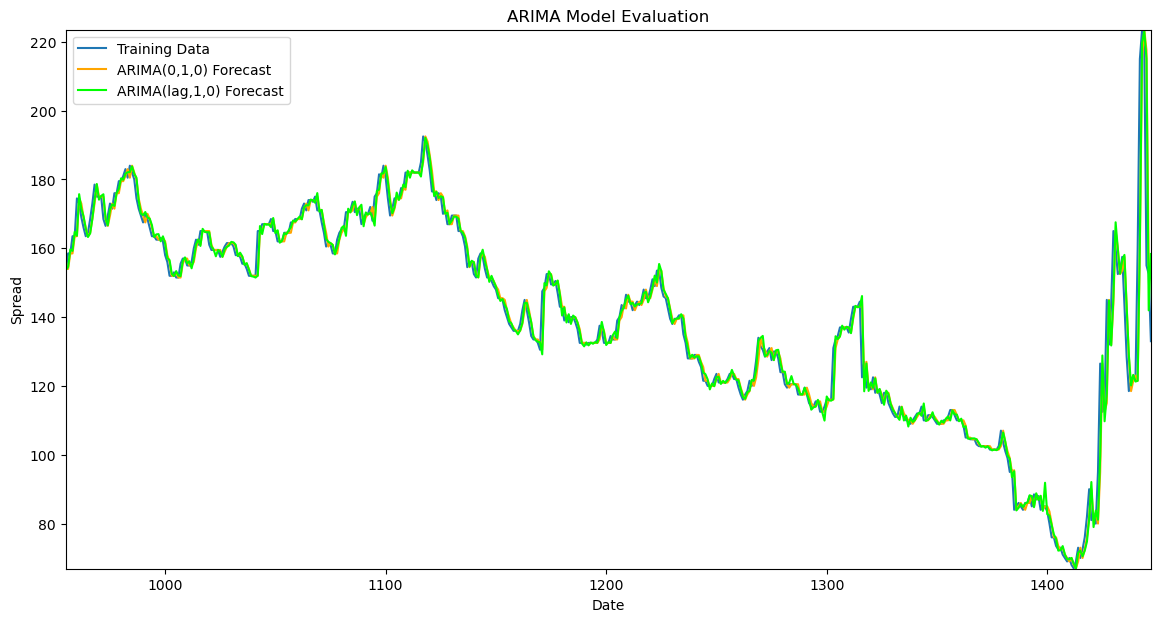


Evaluating column: China_203
Exogenous variables for China_203 2020-04-10 - 2024-01-18: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_203 2020-04-10 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 3.2965, MAE: 1.3791, MAPE: 1.4232
China_203 2020-04-10 - 2024-01-18 ARIMA(2,1,0) Metrics:
RMSE: 3.5025, MAE: 1.7653, MAPE: 1.8732
Better model for China_203 2020-04-10 - 2024-01-18: ARIMA(0,1,0)


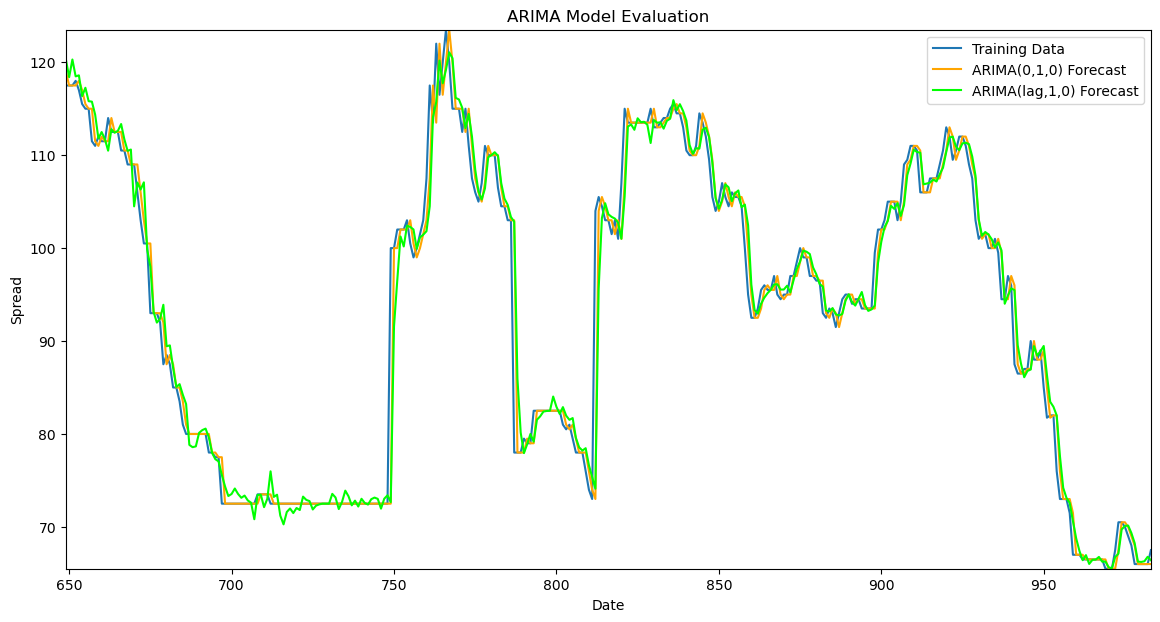

China_209

Evaluating column: China_209
Exogenous variables for China_209 2010-01-01 - 2012-04-04: Price_BRENT, Price_GAS, Price_GOLD, Price_EUR_CNY, Price_USD_CNY
China_209 2010-01-01 - 2012-04-04 ARIMA(0,1,0) Metrics:
RMSE: 6.0704, MAE: 3.6394, MAPE: 2.5589
China_209 2010-01-01 - 2012-04-04 ARIMA(4,1,0) Metrics:
RMSE: 6.2344, MAE: 3.9022, MAPE: 2.7339
Better model for China_209 2010-01-01 - 2012-04-04: ARIMA(0,1,0)


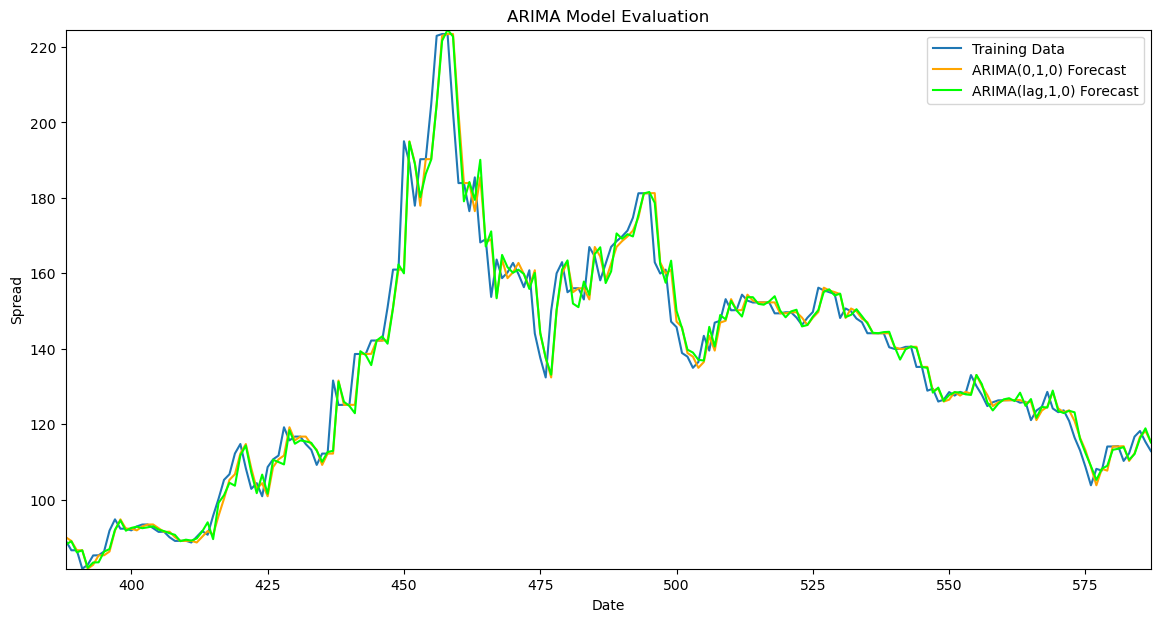


Evaluating column: China_209
Exogenous variables for China_209 2012-04-04 - 2021-10-08: Price_BRENT, Price_GAS, Price_GOLD, Price_EUR_CNY, Price_USD_CNY
China_209 2012-04-04 - 2021-10-08 ARIMA(0,1,0) Metrics:
RMSE: 1.5605, MAE: 0.7880, MAPE: 1.1635
China_209 2012-04-04 - 2021-10-08 ARIMA(4,1,0) Metrics:
RMSE: 1.5547, MAE: 0.8466, MAPE: 1.2675
Better model for China_209 2012-04-04 - 2021-10-08: ARIMA(0,1,0)


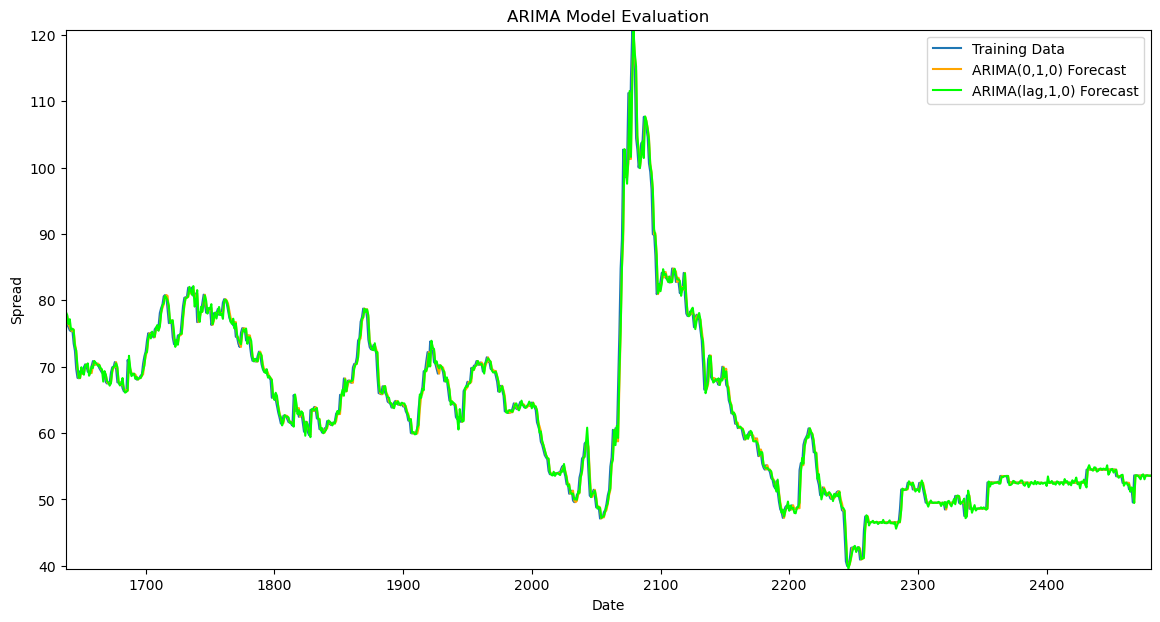


Evaluating column: China_209
Exogenous variables for China_209 2021-10-08 - 2024-01-18: Price_BRENT, Price_GAS, Price_GOLD, Price_EUR_CNY, Price_USD_CNY
China_209 2021-10-08 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 2.1721, MAE: 0.3962, MAPE: 0.4736
China_209 2021-10-08 - 2024-01-18 ARIMA(4,1,0) Metrics:
RMSE: 2.2380, MAE: 0.6652, MAPE: 0.7673
Better model for China_209 2021-10-08 - 2024-01-18: ARIMA(0,1,0)


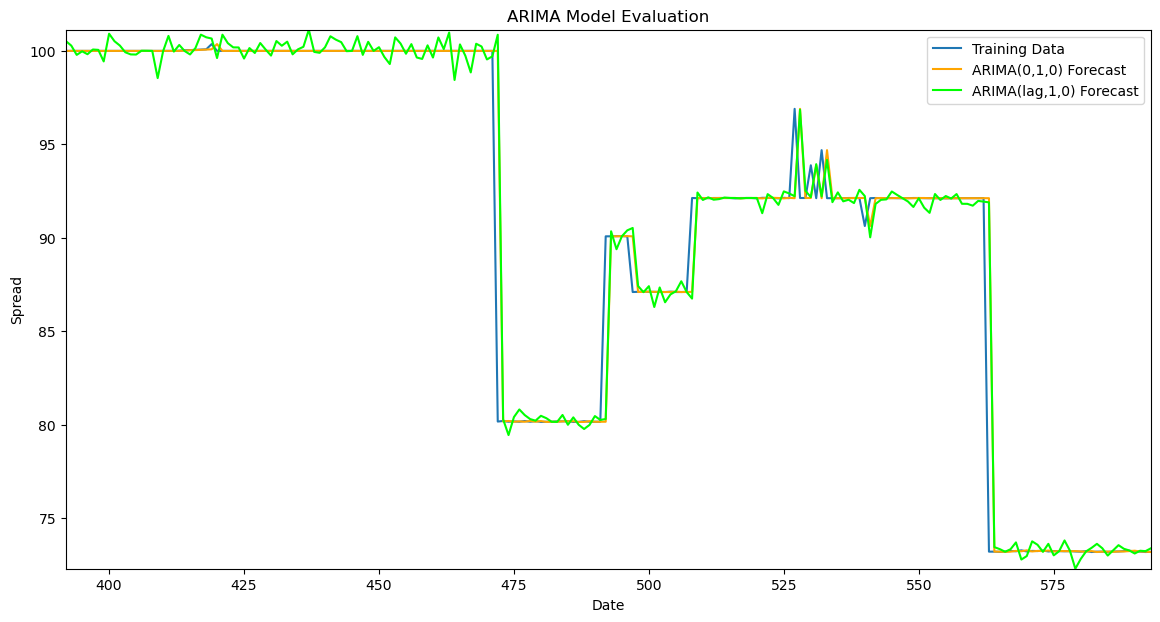

China_213

Evaluating column: China_213
Exogenous variables for China_213 2010-01-01 - 2014-01-16: Price_BRENT, Price_GAS, Price_China_5-Year_Bond, Price_EUR_CNY, Price_USD_CNY
China_213 2010-01-01 - 2014-01-16 ARIMA(0,1,0) Metrics:
RMSE: 2.4150, MAE: 1.1017, MAPE: 1.1879
China_213 2010-01-01 - 2014-01-16 ARIMA(2,1,0) Metrics:
RMSE: 2.3988, MAE: 1.2378, MAPE: 1.3341
Better model for China_213 2010-01-01 - 2014-01-16: ARIMA(0,1,0)


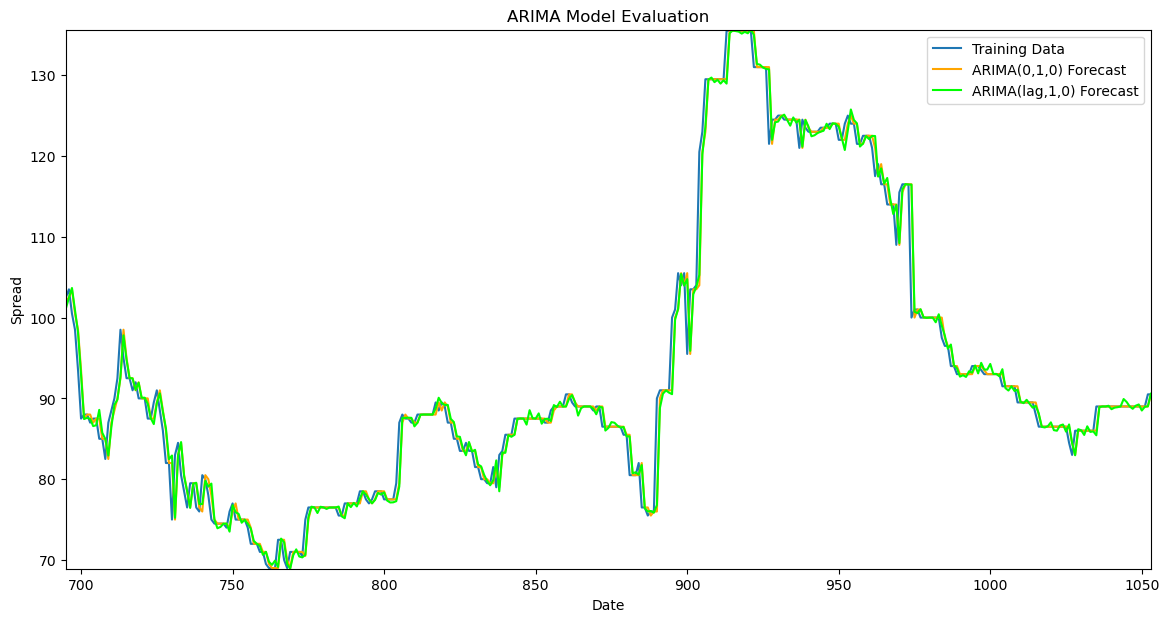


Evaluating column: China_213
Exogenous variables for China_213 2014-01-16 - 2020-03-05: Price_BRENT, Price_GAS, Price_China_5-Year_Bond, Price_EUR_CNY, Price_USD_CNY
China_213 2014-01-16 - 2020-03-05 ARIMA(0,1,0) Metrics:
RMSE: 2.9413, MAE: 1.5267, MAPE: 1.8135
China_213 2014-01-16 - 2020-03-05 ARIMA(2,1,0) Metrics:
RMSE: 2.9321, MAE: 1.5637, MAPE: 1.8712
Better model for China_213 2014-01-16 - 2020-03-05: ARIMA(0,1,0)


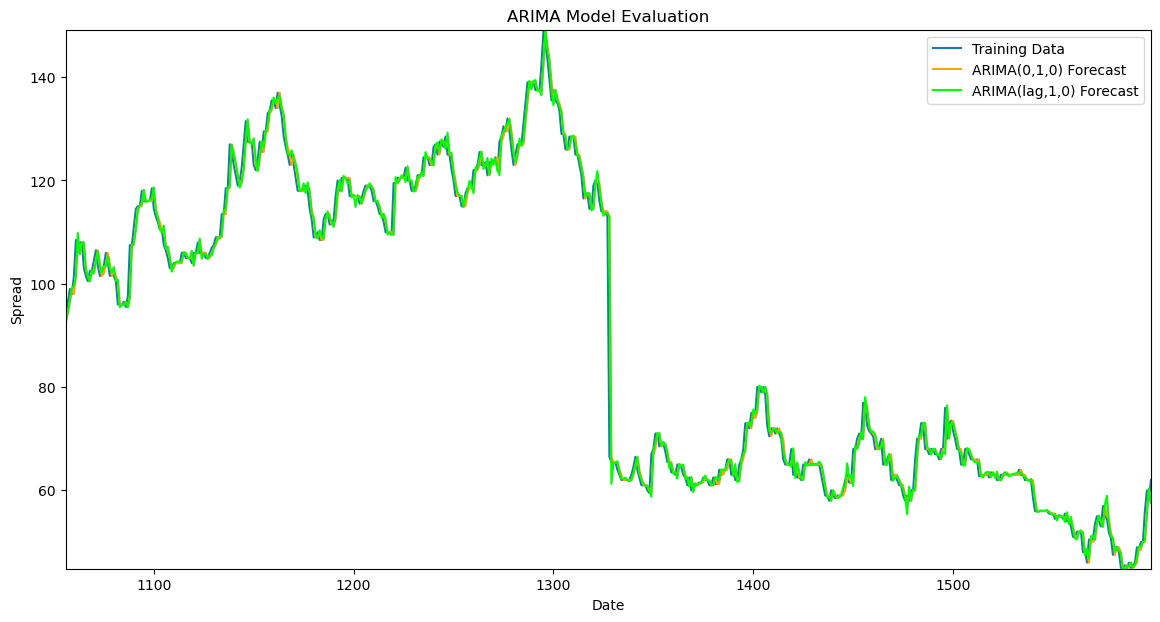


Evaluating column: China_213
Exogenous variables for China_213 2020-03-05 - 2023-04-17: Price_BRENT, Price_GAS, Price_China_5-Year_Bond, Price_EUR_CNY, Price_USD_CNY
China_213 2020-03-05 - 2023-04-17 ARIMA(0,1,0) Metrics:
RMSE: 2.8616, MAE: 0.7310, MAPE: 0.9117
China_213 2020-03-05 - 2023-04-17 ARIMA(2,1,0) Metrics:
RMSE: 2.8758, MAE: 1.1425, MAPE: 1.4760
Better model for China_213 2020-03-05 - 2023-04-17: ARIMA(0,1,0)


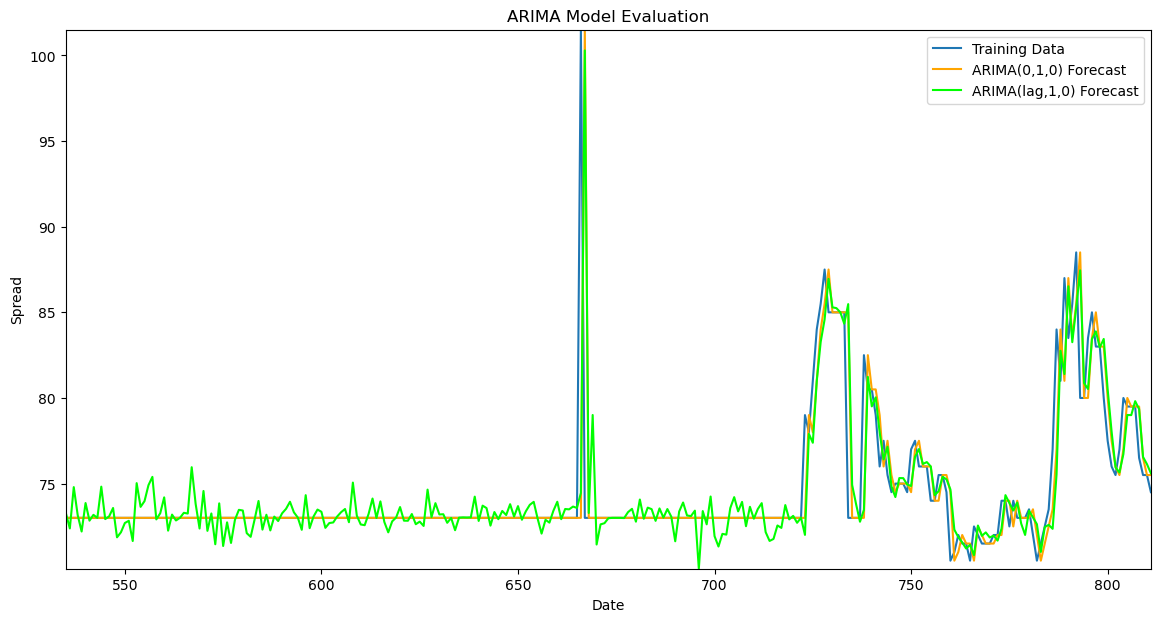

China_228

Evaluating column: China_228
Exogenous variables for China_228 2010-01-01 - 2018-03-01: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_228 2010-01-01 - 2018-03-01 ARIMA(0,1,0) Metrics:
RMSE: 3.3649, MAE: 1.9206, MAPE: 0.9655
China_228 2010-01-01 - 2018-03-01 ARIMA(3,1,0) Metrics:
RMSE: 3.6165, MAE: 2.4884, MAPE: 1.2844
Better model for China_228 2010-01-01 - 2018-03-01: ARIMA(0,1,0)


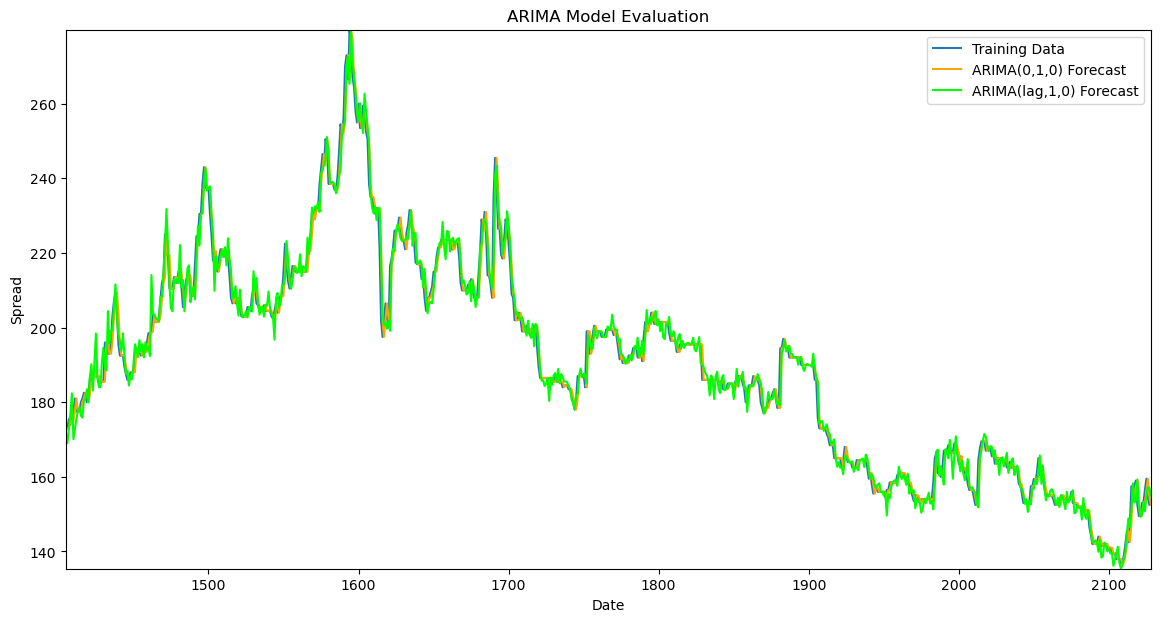


Evaluating column: China_228
Exogenous variables for China_228 2018-03-01 - 2020-03-05: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_228 2018-03-01 - 2020-03-05 ARIMA(0,1,0) Metrics:
RMSE: 2.8616, MAE: 1.5950, MAPE: 1.1683
China_228 2018-03-01 - 2020-03-05 ARIMA(3,1,0) Metrics:
RMSE: 2.8162, MAE: 1.5424, MAPE: 1.1290
Better model for China_228 2018-03-01 - 2020-03-05: ARIMA(3,1,0)


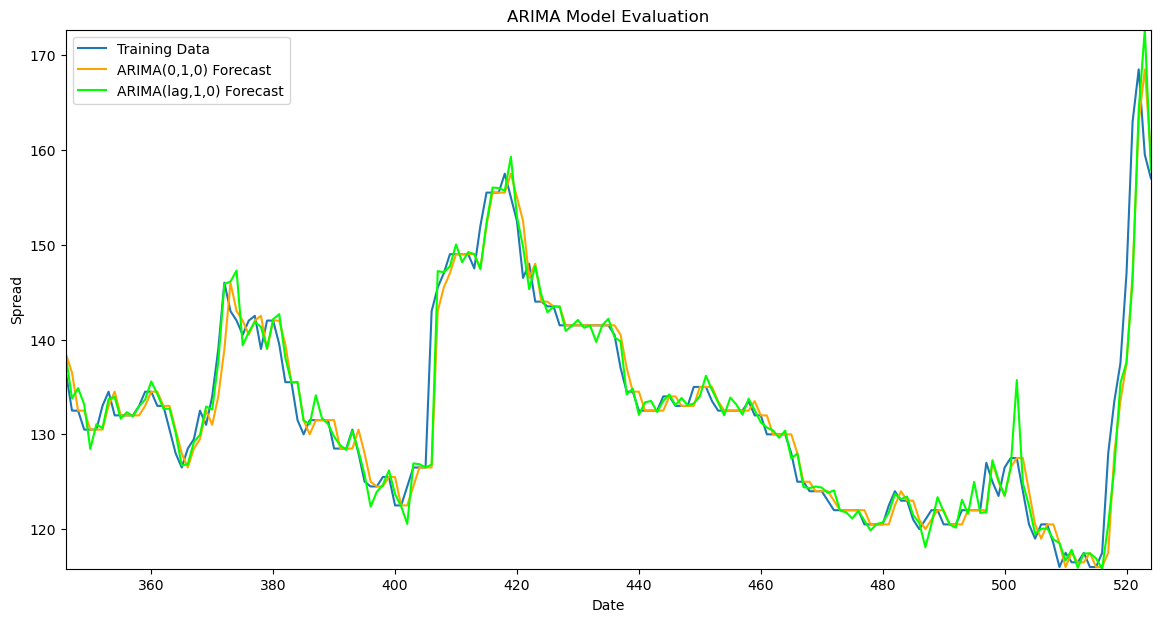


Evaluating column: China_228
Exogenous variables for China_228 2020-03-05 - 2023-06-05: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY, Price_USD_CNY
China_228 2020-03-05 - 2023-06-05 ARIMA(0,1,0) Metrics:
RMSE: 3.5937, MAE: 1.9306, MAPE: 1.1066
China_228 2020-03-05 - 2023-06-05 ARIMA(3,1,0) Metrics:
RMSE: 3.8399, MAE: 2.6959, MAPE: 1.5566
Better model for China_228 2020-03-05 - 2023-06-05: ARIMA(0,1,0)


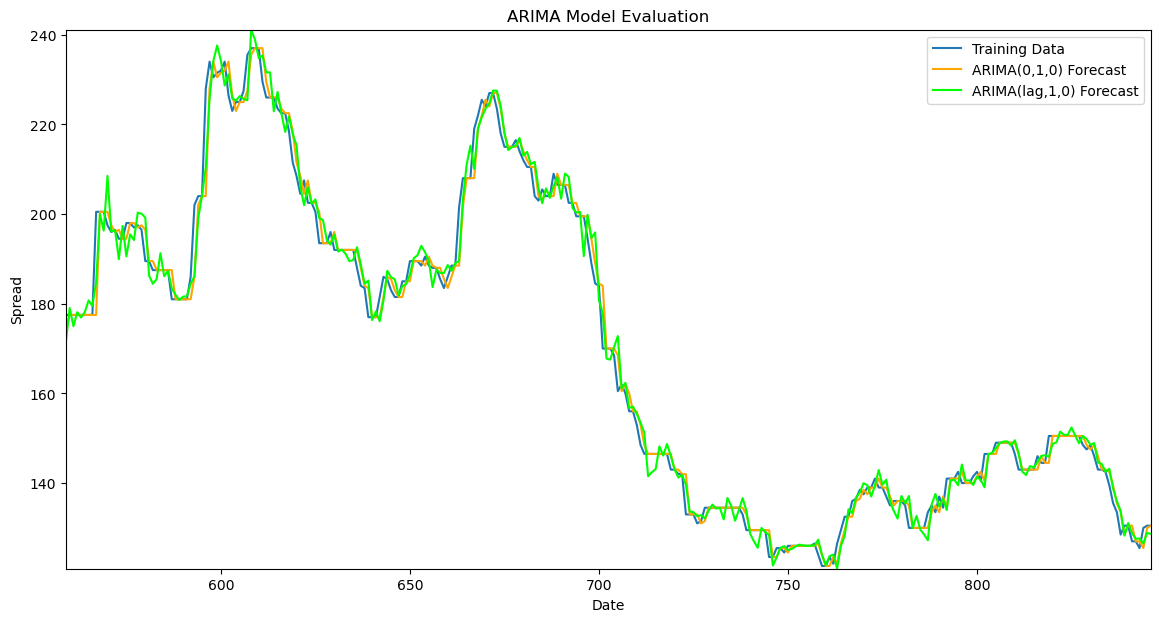

China_250

Evaluating column: China_250
Exogenous variables for China_250 2010-01-01 - 2012-09-24: Price_BRENT, Price_GOLD, Price_China_5-Year_Bond, Price_EUR_CNY, Price_USD_CNY
China_250 2010-01-01 - 2012-09-24 ARIMA(0,1,0) Metrics:
RMSE: 5.0939, MAE: 2.2638, MAPE: 1.2397
China_250 2010-01-01 - 2012-09-24 ARIMA(2,1,0) Metrics:
RMSE: 5.1692, MAE: 2.6796, MAPE: 1.4679
Better model for China_250 2010-01-01 - 2012-09-24: ARIMA(0,1,0)


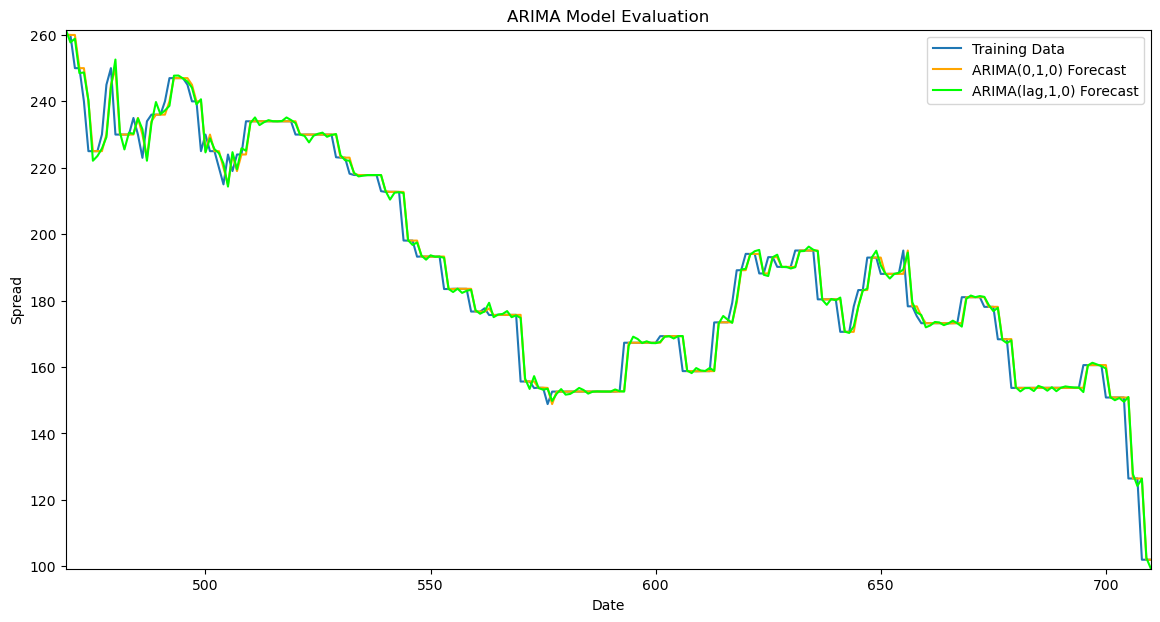


Evaluating column: China_250
Exogenous variables for China_250 2012-09-24 - 2020-03-23: Price_BRENT, Price_GOLD, Price_China_5-Year_Bond, Price_EUR_CNY, Price_USD_CNY
China_250 2012-09-24 - 2020-03-23 ARIMA(0,1,0) Metrics:
RMSE: 1.5859, MAE: 0.8995, MAPE: 1.6101
China_250 2012-09-24 - 2020-03-23 ARIMA(2,1,0) Metrics:
RMSE: 1.5804, MAE: 0.9355, MAPE: 1.6604
Better model for China_250 2012-09-24 - 2020-03-23: ARIMA(0,1,0)


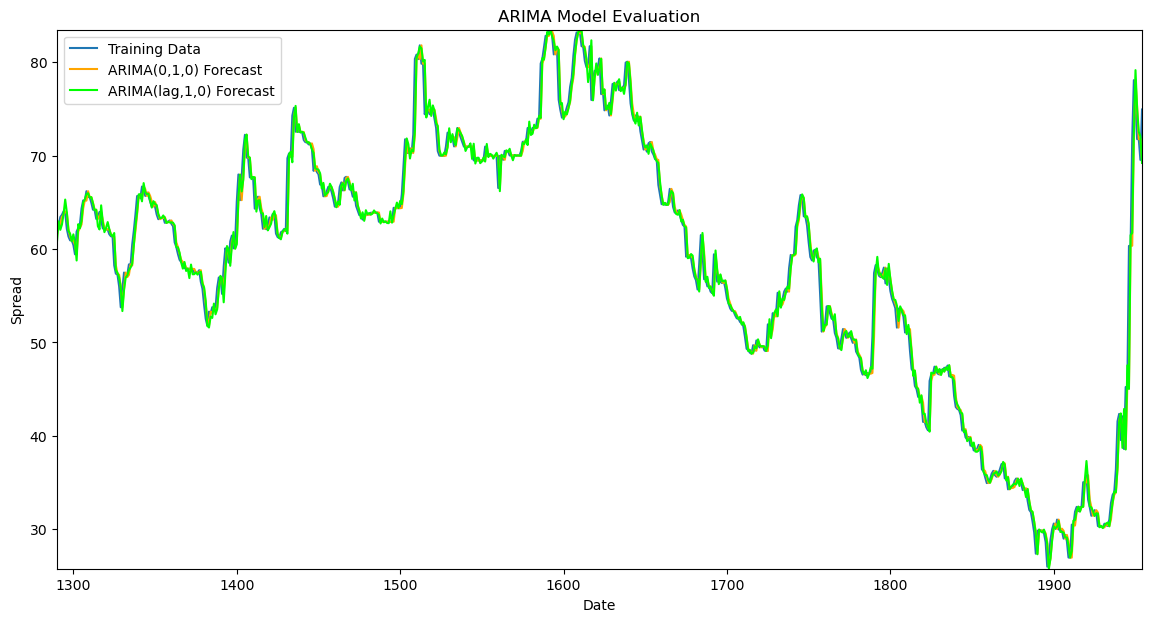


Evaluating column: China_250
Exogenous variables for China_250 2020-03-23 - 2024-01-18: Price_BRENT, Price_GOLD, Price_China_5-Year_Bond, Price_EUR_CNY, Price_USD_CNY
China_250 2020-03-23 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 2.3535, MAE: 1.2599, MAPE: 1.5691
China_250 2020-03-23 - 2024-01-18 ARIMA(2,1,0) Metrics:
RMSE: 2.3942, MAE: 1.3728, MAPE: 1.7173
Better model for China_250 2020-03-23 - 2024-01-18: ARIMA(0,1,0)


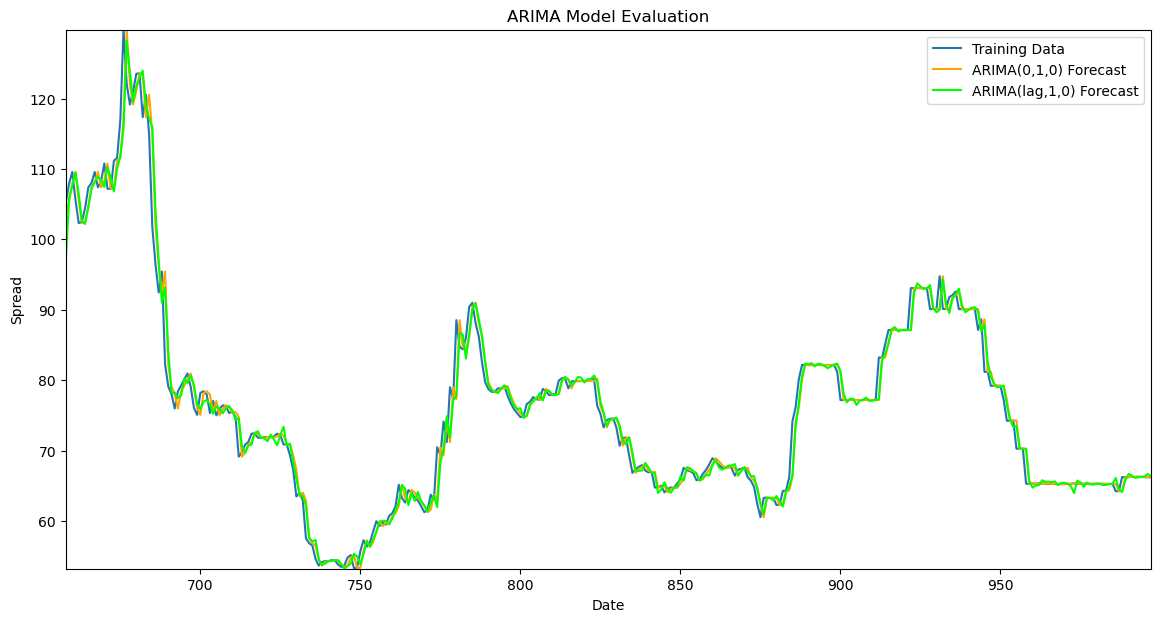

China_265

Evaluating column: China_265
Exogenous variables for China_265 2013-04-02 - 2015-05-15: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY
China_265 2013-04-02 - 2015-05-15 ARIMA(0,1,0) Metrics:
RMSE: 11.9651, MAE: 7.0106, MAPE: 1.4561
China_265 2013-04-02 - 2015-05-15 ARIMA(6,1,0) Metrics:
RMSE: 12.6561, MAE: 7.9706, MAPE: 1.6706
Better model for China_265 2013-04-02 - 2015-05-15: ARIMA(0,1,0)


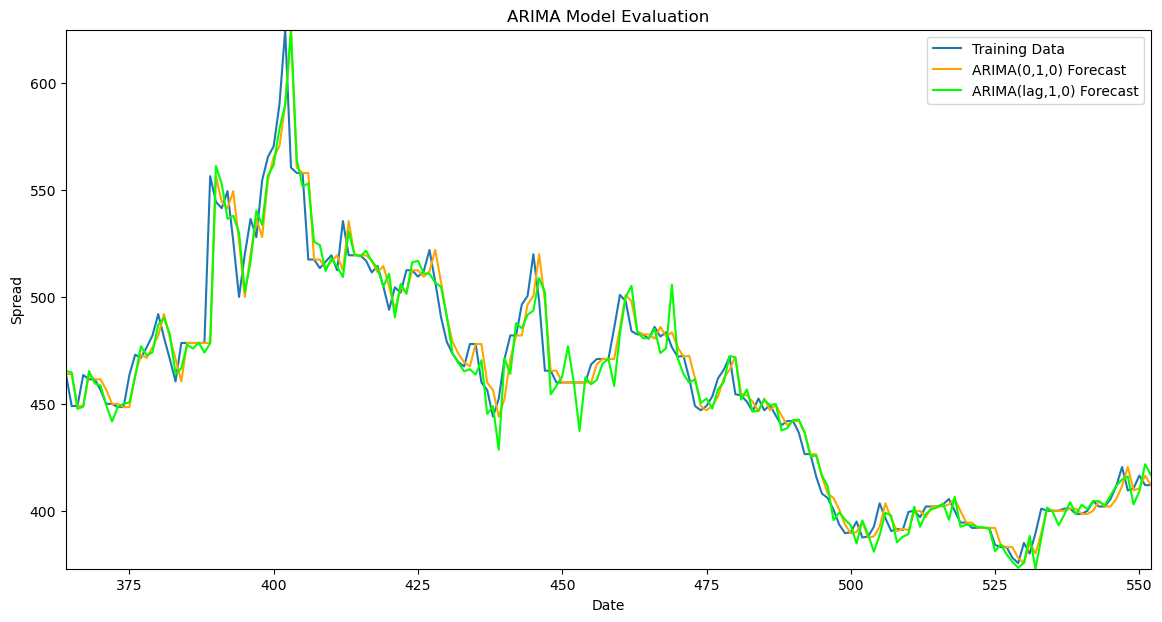


Evaluating column: China_265
Exogenous variables for China_265 2015-05-15 - 2016-12-05: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY
China_265 2015-05-15 - 2016-12-05 ARIMA(0,1,0) Metrics:
RMSE: 9.1179, MAE: 5.6403, MAPE: 1.3769
China_265 2015-05-15 - 2016-12-05 ARIMA(6,1,0) Metrics:
RMSE: 8.7522, MAE: 5.5830, MAPE: 1.3672
Better model for China_265 2015-05-15 - 2016-12-05: ARIMA(6,1,0)


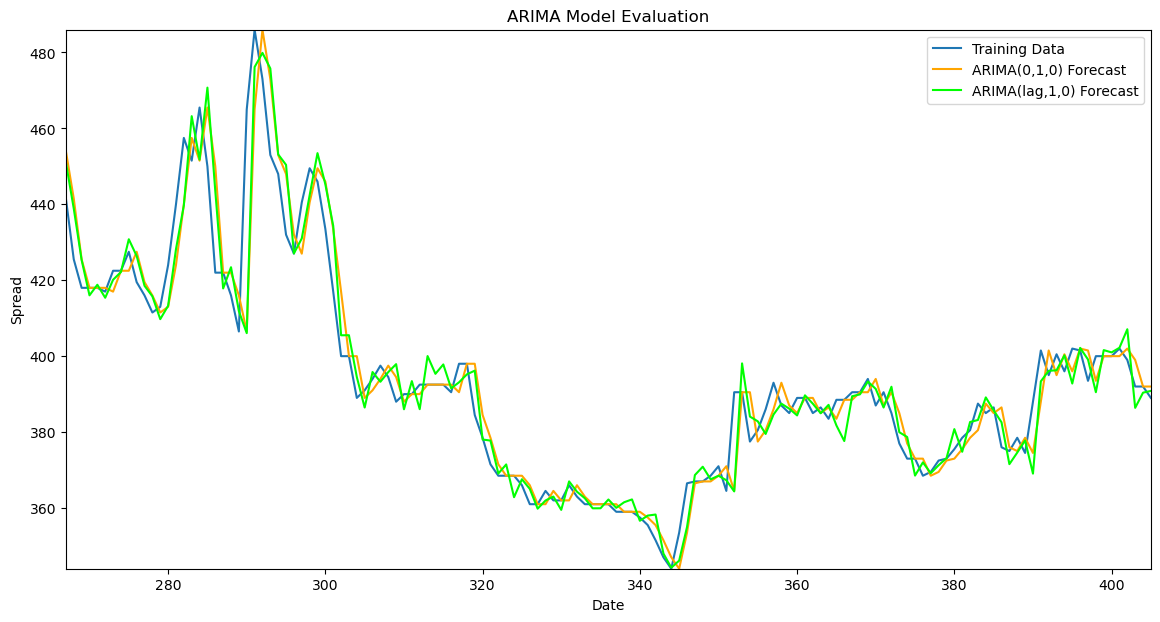


Evaluating column: China_265
Exogenous variables for China_265 2016-12-05 - 2023-06-07: Price_BRENT, Price_GAS, Price_GOLD, Price_China_5-Year_Bond, Price_CSI_300, Price_EUR_CNY
China_265 2016-12-05 - 2023-06-07 ARIMA(0,1,0) Metrics:
RMSE: 4.6579, MAE: 2.3709, MAPE: 0.6673
China_265 2016-12-05 - 2023-06-07 ARIMA(6,1,0) Metrics:
RMSE: 5.2796, MAE: 3.4363, MAPE: 0.9790
Better model for China_265 2016-12-05 - 2023-06-07: ARIMA(0,1,0)


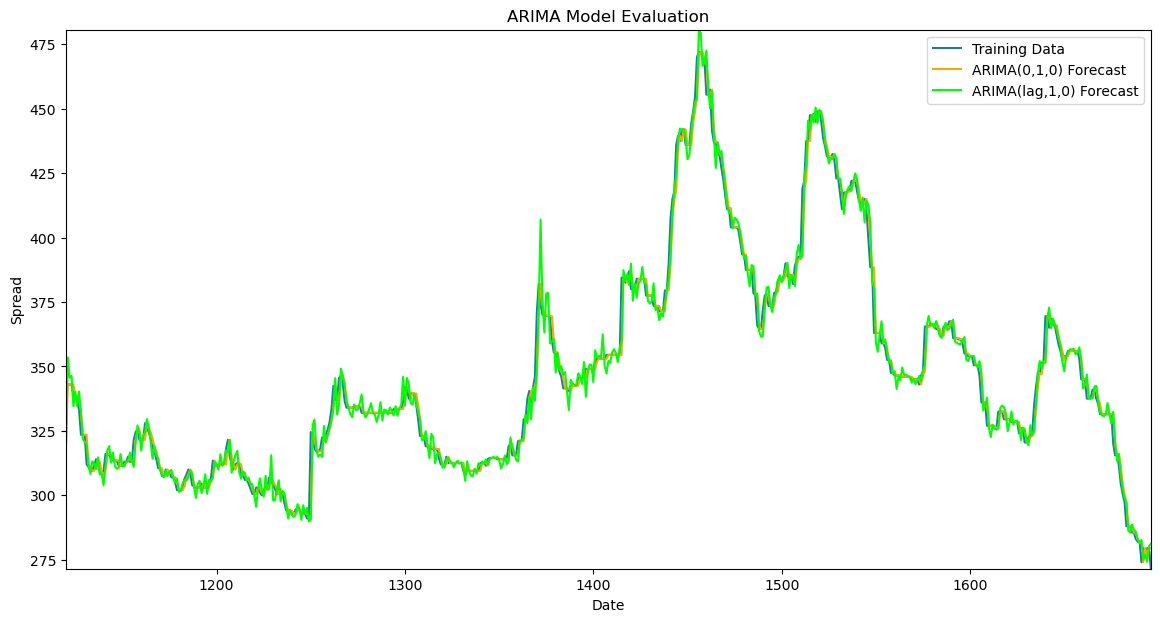

Date


KeyError: 'Date'

In [4]:
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel files
Sheet1 = 'Sheet1'
excel_file1 = 'corrected_series_China.xlsx'    ### country
df = pd.read_excel(excel_file1, sheet_name=Sheet1)

excel_file2 = 'Tests.xlsx'
sheet_name2 = 'Kept_Regressors'
regressors_df = pd.read_excel(excel_file2, sheet_name=sheet_name2)

excel_file3 = 'corrected_series_exog.xlsx'
exog_df = pd.read_excel(excel_file3, sheet_name=Sheet1)

# Create a dictionary to map CDS spread names to their exogenous variables
exog_vars_dict = {}
for column in regressors_df.columns[1:]:
    spread_name = column
    exog_vars = list(regressors_df.loc[regressors_df[column] == 1, 'Exog_Names'])
    exog_vars_dict[spread_name] = exog_vars

chosen_lags = {'China_4': 3, 'China_33': 4, 'China_103': 2, 'China_165': 5, 'China_169': 4, 'China_203': 2, 'China_209': 4, 'China_213': 2, 'China_228': 3, 'China_250': 2, 'China_265': 6}
### country ^

# Function to calculate MAPE
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Dictionaries to store fitted models and forecasts for each column
all_fitted_models = {}
all_forecasts = {}

# Create an empty DataFrame to store metrics
metrics_df = []

# Iterate over columns and compare models
for company in df.columns[1:14]:           ### country
    print(company)
    shortcol = df[[company, "Date"]].dropna().reset_index()
    intervals = list(breaksdf2[company].dropna())
    intervals.append(shortcol.iloc[-1]["Date"])
    
    strartinterval = 0
    
    # Iterate over columns and compare models
    for interval in range(len(intervals)):
        
        if (intervals[interval] in list(shortcol["Date"])) is False:
            continue
        
        
        column = company ### 
        if column in chosen_lags:
            print(f"\nEvaluating column: {column}")


            intervalindex = int(shortcol[shortcol['Date'] == intervals[interval]].index.values)
            series = shortcol[strartinterval:intervalindex][company]

            interval_name = str(shortcol["Date"][strartinterval])[:10] + " - " + str(intervals[interval])[:10]
            column_name = column + " " + interval_name
            #series = df[column]
            #column_name = column

            # Get the list of exogenous variables for the current CDS spread
            exog_vars = exog_vars_dict.get(column, [])
            exog_series = shortcol.merge(exog_df, on="Date")
        print(f"Exogenous variables for {column_name}: {', '.join(exog_vars)}")

        # Function to evaluate and compare models
        start_index = series.first_valid_index()
        end_index = series.last_valid_index()
        series = series.loc[start_index:end_index]
        series = series.reset_index(drop=True)

        # Subset the exogenous variable columns to match the length of the CDS spread series
        exog_data = exog_series[exog_vars].loc[start_index:end_index]
        exog_data = exog_data.reset_index(drop=True)

        size = int(len(series) * 0.66)
        train, test = series[0:size], series[size:len(series)]
        history = [x for x in train]
        exog_history = exog_data.iloc[:size].values.tolist()

        rw_predictions = list()
        arima_predictions = list()
        test_data = list(test)

        # Walk-forward validation
        for t in range(len(test)):
            # Evaluate ARIMA(0,1,0) model
            rw_model = ARIMA(history, order=(0, 1, 0))
            rw_model_fit = rw_model.fit()
            rw_output = rw_model_fit.forecast()
            rw_yhat = rw_output[0]
            rw_predictions.append(rw_yhat)

            # Evaluate ARIMA(x,1,0) model with exogenous variables
            lag = chosen_lags.get(column, 1)
            arima_model = ARIMA(history, order=(lag, 1, 0), exog=exog_history)
            arima_model_fit = arima_model.fit(method_kwargs={"warn_convergence": False})
            arima_output = arima_model_fit.forecast(exog=exog_data.iloc[size + t:size + t + 1].values)
            arima_yhat = arima_output[0]
            arima_predictions.append(arima_yhat)

            obs = test[t + len(train)]
            history.append(obs)
            exog_history.append(exog_data.iloc[size + t].values.tolist())

        # Evaluate forecasts
        rw_rmse = sqrt(mean_squared_error(test, rw_predictions))
        arima_rmse = sqrt(mean_squared_error(test, arima_predictions))
        rw_mae = mean_absolute_error(test, rw_predictions)
        arima_mae = mean_absolute_error(test, arima_predictions)
        rw_mape = mape(test, rw_predictions)
        arima_mape = mape(test, arima_predictions)

        # Inside the compare_models function, after calculating metrics
        metrics_df.append({
            'Column': column_name,
            'Model': 'ARIMA(0,1,0)',
            'RMSE': rw_rmse,
            'MAE': rw_mae,
            'MAPE': rw_mape
        })

        metrics_df.append({
            'Column': column_name,
            'Model': f'ARIMA({lag},1,0)',
            'RMSE': arima_rmse,
            'MAE': arima_mae,
            'MAPE': arima_mape
        })
        

        # Compare models
        
        # Compare models based on all metrics
        rw_better_count = 0
        arima_better_count = 0
        
        if rw_rmse < arima_rmse:
            rw_better_count += 1
        else:
            arima_better_count += 1

        if rw_mae < arima_mae:
            rw_better_count += 1
        else:
            arima_better_count += 1

        if rw_mape < arima_mape:
            rw_better_count += 1
        else:
            arima_better_count += 1
            
        if rw_better_count > arima_better_count:
            better_model = "ARIMA(0,1,0)"
        elif arima_better_count > rw_better_count:
            better_model = f"ARIMA({lag},1,0)"
        else:
            better_model = "No clear winner"
            
        # Print forecast metrics and the better model
        print(f"{column_name} ARIMA(0,1,0) Metrics:")
        print(f"RMSE: {rw_rmse:.4f}, MAE: {rw_mae:.4f}, MAPE: {rw_mape:.4f}")
        print(f"{column_name} ARIMA({lag},1,0) Metrics:")
        print(f"RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, MAPE: {arima_mape:.4f}")
        print(f"Better model for {column_name}: {better_model}")
    
        # Store fitted models and forecasts for the current columns
        fitted_models = {'rw_model': rw_model_fit, 'arima_model': arima_model_fit}
        forecasts = {'rw_predictions': rw_predictions, 'arima_predictions': arima_predictions, 'test_data': test_data}
        all_fitted_models[column_name] = fitted_models
        all_forecasts[column_name] = forecasts

        # Create a plot to compare the forecast with the actual test data
        plt.figure(figsize=(14, 7))
        plt.plot(series, label='Training Data')
        # Create Series objects for the predictions
        test_forecast_series_rw = pd.Series(rw_predictions, index=test.index)
        test_forecast_series_arima = pd.Series(arima_predictions, index=test.index)
        # Determine the relevant range for zooming
        x_min, x_max = test.index.min(), test.index.max()
        y_min, y_max = min(test.min(), test_forecast_series_rw.min(), test_forecast_series_arima.min()), max(test.max(), test_forecast_series_rw.max(), test_forecast_series_arima.max())
        # Plot the data
        plt.plot(test_forecast_series_rw, label='ARIMA(0,1,0) Forecast', color='orange')
        plt.plot(test_forecast_series_arima, label='ARIMA(lag,1,0) Forecast', color='lime')
        # Zoom in on the relevant range
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.title('ARIMA Model Evaluation')
        plt.xlabel('Date')
        plt.ylabel('Spread')
        plt.legend()
        plt.show()
        
        strartinterval = intervalindex

In [11]:
metrics_df = pd.DataFrame(metrics_df)

In [12]:
# Export model summaries from all_fitted_models to a Word file
document = docx.Document()
for column_name, models in all_fitted_models.items():
    document.add_heading(f'Column: {column_name}', level=0)
    rw_model_fit = models['rw_model']
    arima_model_fit = models['arima_model']
    lag = chosen_lags.get(column_name, 1)

    document.add_heading('ARIMA(0,1,0) Summary:', level=1)
    document.add_paragraph(str(rw_model_fit.summary()))

    document.add_heading(f'ARIMA({lag},1,0) Summary:', level=1)
    document.add_paragraph(str(arima_model_fit.summary()))

document.save('ARIMA_ex_model_summaries_China_Intervals.docx') ### country

In [13]:
# After the loop over columns
# Export the metrics DataFrame to an Excel file
metrics_df.to_excel('ARIMA_ex_model_metrics_China_Intervals.xlsx', index=False) ### country

In [14]:
# After the loop over columns

# Create an empty dictionary to store the reshaped data
reshaped_data = {}

# Loop through each column name (series) in all_forecasts
for column_name, forecasts in all_forecasts.items():
    # Unpack the forecasts for the current column
    rw_predictions, arima_predictions, test_data = forecasts['rw_predictions'], forecasts['arima_predictions'], forecasts['test_data']
    # Create a DataFrame for the current column
    column_df = pd.DataFrame({
        'index': range(len(rw_predictions)),
        f'rw_predictions_{column_name}': rw_predictions,
        f'arima_predictions_{column_name}': arima_predictions,
        f'test_data_{column_name}': test_data
    })

    # Append the DataFrame to the reshaped_data dictionary
    for col in column_df.columns:
        reshaped_data[col] = column_df[col]

In [15]:
forecasts_df = pd.DataFrame(reshaped_data)

# Export the DataFrame to an Excel file
forecasts_df.to_excel('ARIMA_ex_model_forecasts_China_Intervals.xlsx', index=False) ### country

In [16]:
metrics_df

Column         Model       RMSE        MAE  \
0     China_4 2010-01-01 - 2012-05-31  ARIMA(0,1,0)  45.313395  33.415888   
1     China_4 2010-01-01 - 2012-05-31  ARIMA(3,1,0)  43.057421  31.904953   
2     China_4 2012-05-31 - 2014-11-19  ARIMA(0,1,0)  12.346916   7.700913   
3     China_4 2012-05-31 - 2014-11-19  ARIMA(3,1,0)  13.045764   8.985674   
4     China_4 2014-11-19 - 2023-06-07  ARIMA(0,1,0)   7.147675   3.745059   
..                                ...           ...        ...        ...   
61  China_265 2013-04-02 - 2015-05-15  ARIMA(6,1,0)  12.656106   7.970558   
62  China_265 2015-05-15 - 2016-12-05  ARIMA(0,1,0)   9.117932   5.640288   
63  China_265 2015-05-15 - 2016-12-05  ARIMA(6,1,0)   8.752163   5.582972   
64  China_265 2016-12-05 - 2023-06-07  ARIMA(0,1,0)   4.657879   2.370884   
65  China_265 2016-12-05 - 2023-06-07  ARIMA(6,1,0)   5.279617   3.436307   

        MAPE  
0   2.463871  
1   2.359775  
2   1.356511  
3   1.594519  
4   0.814229  
..       ...  
61  1.670588  
62  1.376915  
63  1.367192  
64  0.667262  
65  0.978959  

[66 rows x 5 columns]